## **SC1015 Mini Project**

1.   Sushmita Ramaratnam (U2222958B)
2.   Shrutikhaa Katakam (U2223972L)

## **Contents**

1. Cleaning of Data
2. Visualization of the Data
3. Exploratory Analysis
4. Machine Learning
5. Simple Neural Network 
6. Findings and Summary

## **Objective**

Attrition of nurses in the US Healthcare system is at an all-time high. It is a major area of focus, especially for hospitals.

This dataset contains employee and company data useful for supervised ML, unsupervised ML, and analytics. Attrition - whether an employee left or not - is included and can be used as the target variable.

https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare

We aim to find out:
*   The main factors that can be linked to the attrition of an employee 
*   How hospitals can improve itself to retain employees



In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

##### Creating a DataFrame for the Data Set

In [2]:
# Import dataset
healthdata = pd.read_csv('watson_healthcare_modified.csv')
healthdata

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [3]:
# Column Analysis 
print (healthdata.dtypes)

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

## **STEP 1: Cleaning**

In this section, we aim to check for missing/null values and remove columns that are insignificant in predicting attrition

In [4]:
#removal of insignificant columns such as "EmployeeCount", "Over18", and "StandardHours", which are uniform for everyone
agedf = pd.DataFrame(healthdata['Age'])
healthdata = healthdata.drop(columns = ['EmployeeCount','Over18','StandardHours'])

In [5]:
# Done to convert the attrition column values from 'No' and "Yes" to '0' and '1'. 
# This ensures that the existing dataframe is modified and a new dataframe isn't created.
healthdata.Attrition.replace(to_replace=['No', 'Yes'], value=[0,1], inplace=True)

In [6]:
#Ensuring the Employee IDs are unique
healthdata['EmployeeID'].is_unique

True

In [7]:
healthdata = healthdata.drop(columns = ['EmployeeID'])

In [8]:
healthdata

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,3,Male,...,3,2,0,1,3,1,1,0,0,0
1672,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,3,Female,...,3,3,1,15,3,3,3,2,1,2
1673,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,4,Female,...,3,4,0,1,0,4,1,0,0,0
1674,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,4,Female,...,3,3,1,21,3,3,21,6,11,8


In [9]:
#list of all data types variables
dtypes = healthdata.dtypes
dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
Shift                        int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [10]:
print(len(healthdata.columns))

31


In [11]:
dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [12]:
healthdata.select_dtypes(['int64']).keys().size

24

In [13]:
healthdata.select_dtypes(['O']).keys().size

7

In [14]:
#Statistical inference of different factors affecting the attrition
healthNumeric = healthdata.select_dtypes(['int64', 'float'])
healthNumeric.describe().round(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,...,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00
mean,36.87,0.12,800.56,9.22,2.91,2.71,65.47,2.72,2.07,2.74,...,3.15,2.72,0.81,11.34,2.81,2.77,7.03,4.26,2.20,4.14
std,9.13,0.32,401.59,8.16,1.03,1.10,20.21,0.71,1.11,1.10,...,0.36,1.08,0.86,7.83,1.29,0.70,6.10,3.63,3.23,3.56
min,18.00,0.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,...,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,0.00,465.00,2.00,2.00,2.00,48.00,2.00,1.00,2.00,...,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,0.00,796.50,7.00,3.00,3.00,65.50,3.00,2.00,3.00,...,3.00,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,0.00,1157.00,14.00,4.00,4.00,83.00,3.00,3.00,4.00,...,3.00,4.00,1.00,15.00,3.00,3.00,10.00,7.00,3.00,7.00
max,60.00,1.00,1499.00,29.00,5.00,4.00,100.00,4.00,5.00,4.00,...,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [15]:
#Check for NULL values in entire dataframe
healthdata.isnull().values.any()

False

#### Data Distribution
In the above data cleaning process, we found that there are 31  variables, out of which 24 are numeric variables and 7 are categorical variables. The numeric variables can be further divided into 10 factor variables and 14 regular numeric variables. 

* Factor variables are those that store an integer/float value but can be mapped to a categorical value

## **STEP 2: DATA VISUALIZATION **

In this section, we will perform data visualization on the numeric and categorical variables within the dataset. This helps us understand their breakdowns and sets us up for machine learning.

In [17]:
#Attrition Rates
ay,an = healthdata["Attrition"].value_counts()
print("Total no of employees " ,ay+an , " Attrition Yes ",ay," Attrition No ",an,"\n")
print("Attrition Yes % ",round(ay*100/(ay+an),2), "Attrition No % ",round(an*100/(ay+an),2),"\n")
healthdata["Attrition"].value_counts()


Total no of employees  1676  Attrition Yes  1477  Attrition No  199 

Attrition Yes %  88.13 Attrition No %  11.87 



0    1477
1     199
Name: Attrition, dtype: int64

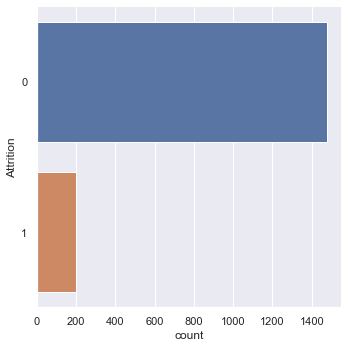

In [18]:
#Attrition
sb.catplot(y = "Attrition", data = healthdata, kind = "count")

NameError: name 'healthlevel' is not defined

#### NUMERIC VARIABLES

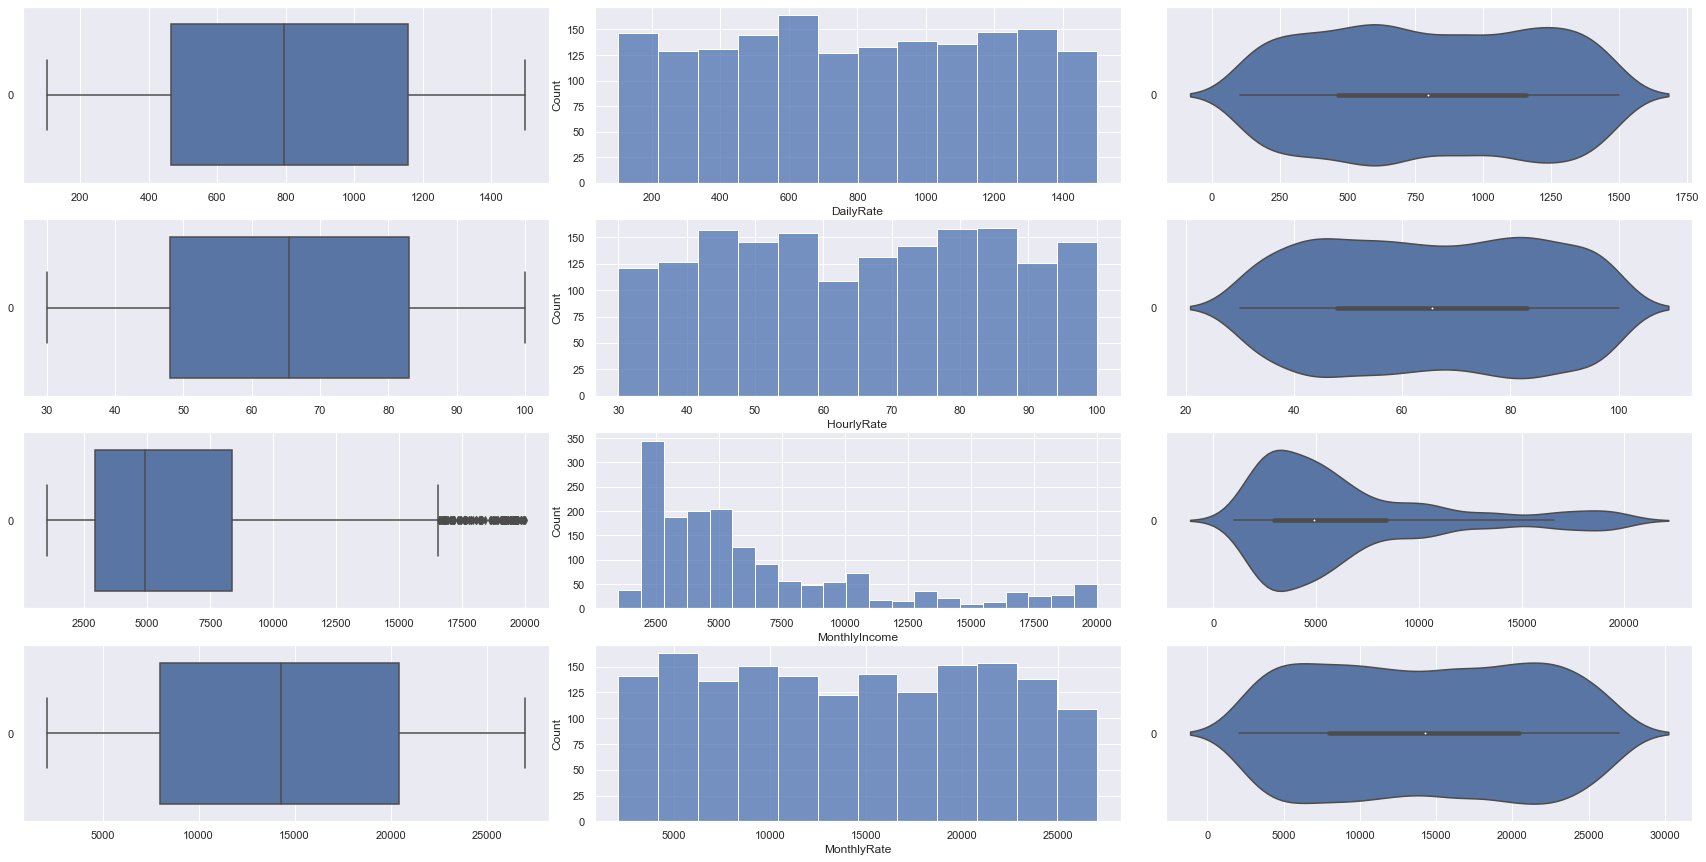

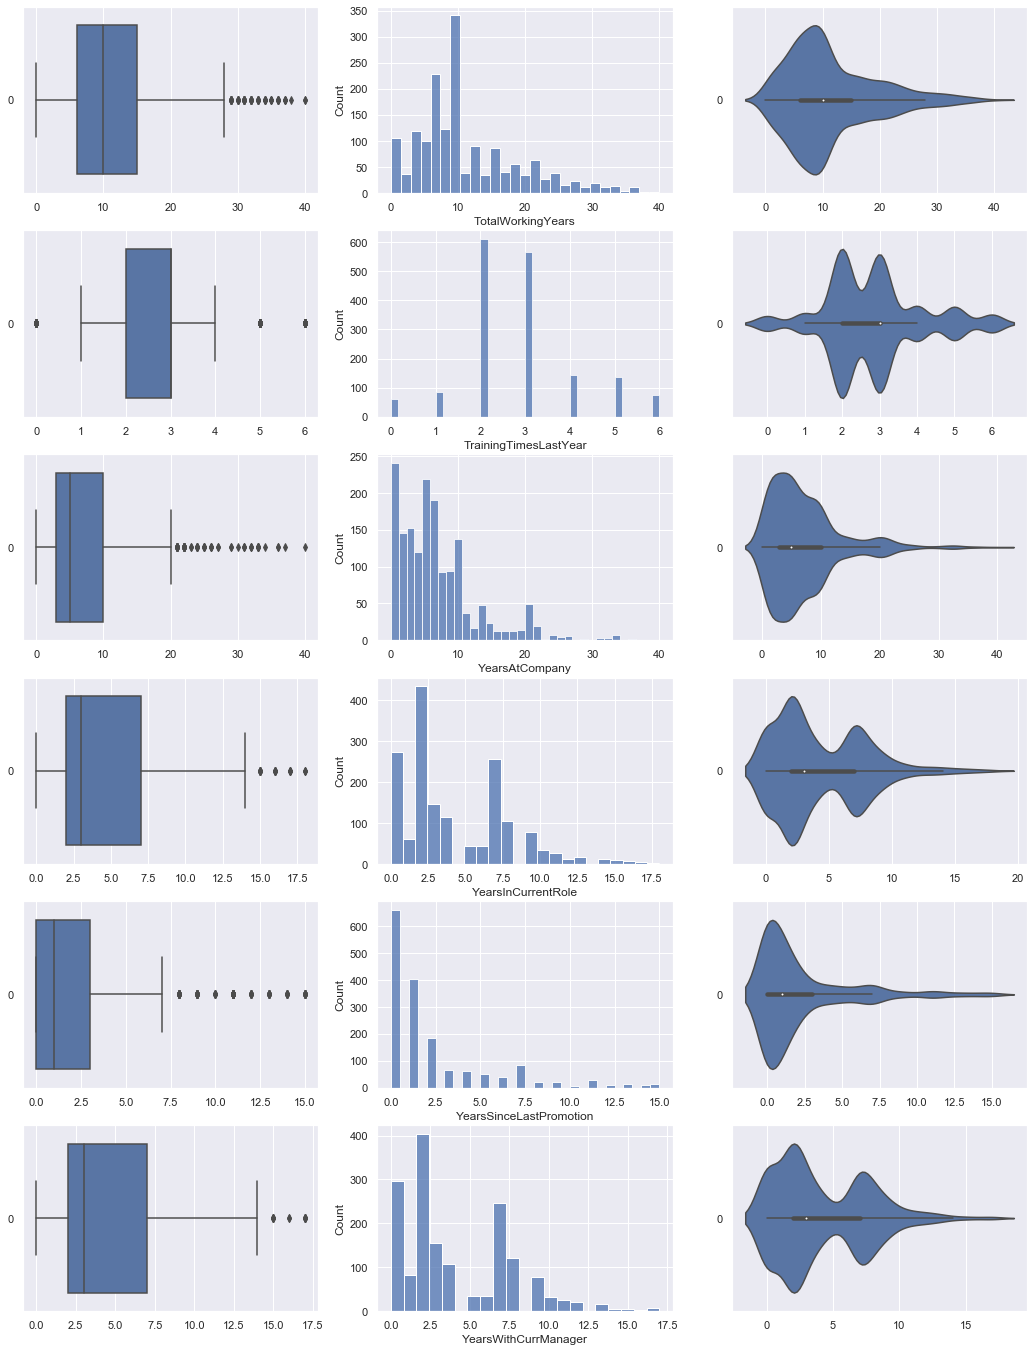

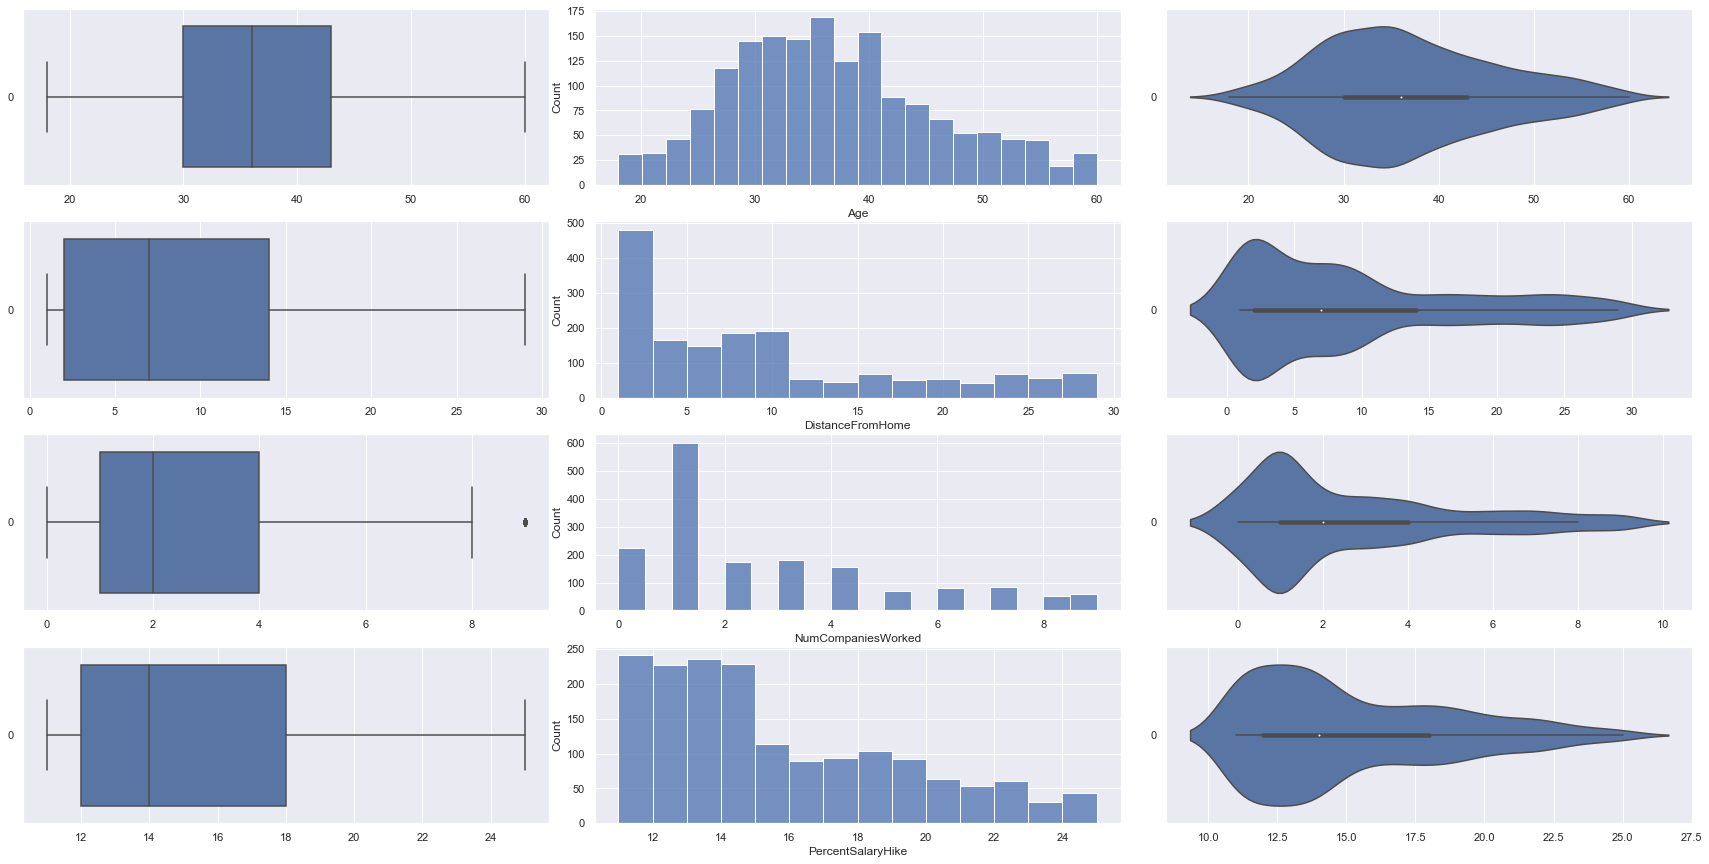

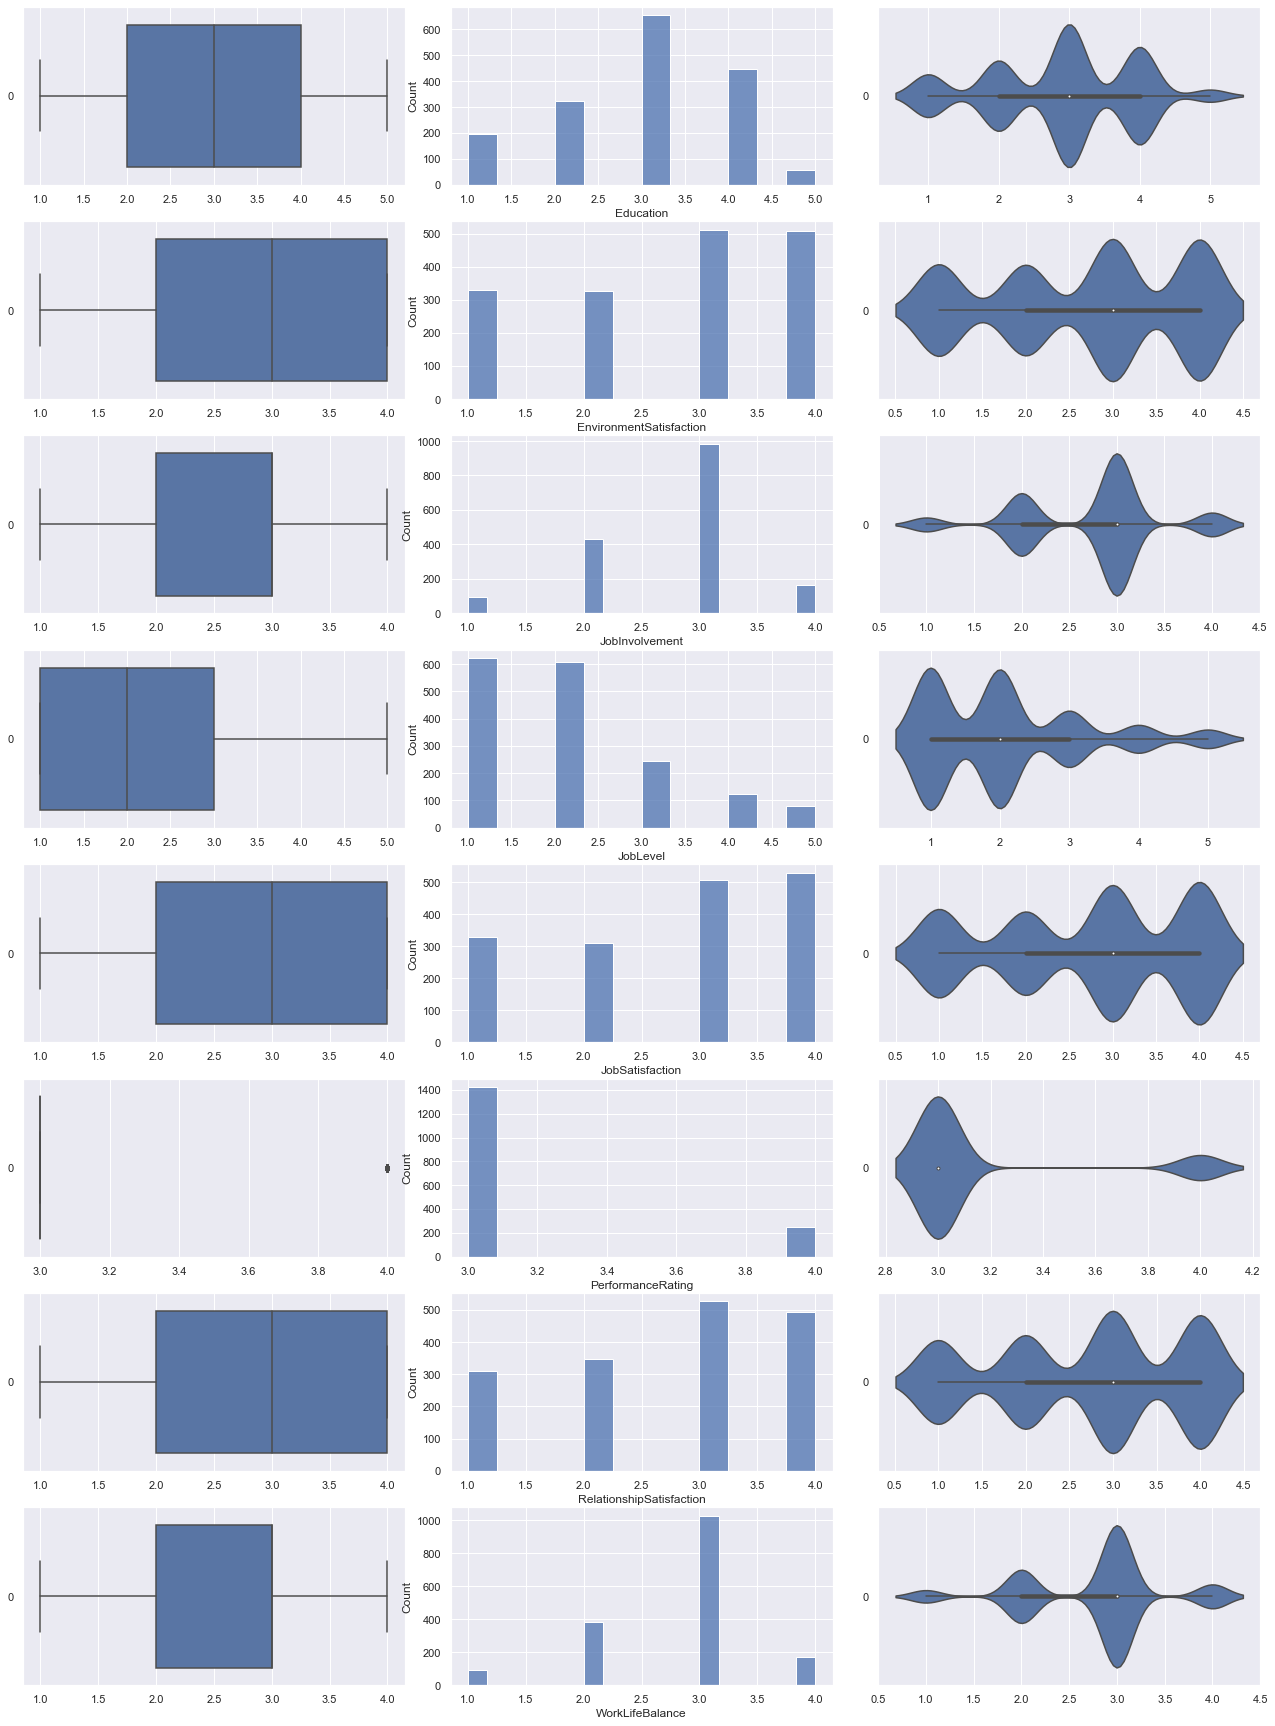

In [67]:
# Large numeric data

f, axes = plt.subplots(4, 3, figsize=(24, 12))

# Format the layout so that no overlapping between titles and graphs
plt.tight_layout()

# Daily Rate
sb.boxplot(data = healthNumeric["DailyRate"], orient = "h", ax = axes[0,0])
sb.histplot(data = healthNumeric["DailyRate"], ax = axes[0,1])
sb.violinplot(data = healthNumeric["DailyRate"], orient = "h", ax = axes[0,2])

# Hourly Rate
sb.boxplot(data = healthNumeric["HourlyRate"], orient = "h", ax = axes[1,0])
sb.histplot(data = healthNumeric["HourlyRate"], ax = axes[1,1])
sb.violinplot(data = healthNumeric["HourlyRate"], orient = "h", ax = axes[1,2])

# Monthly Income
sb.boxplot(data = healthNumeric["MonthlyIncome"], orient = "h", ax = axes[2,0])
sb.histplot(data = healthNumeric["MonthlyIncome"], ax = axes[2,1])
sb.violinplot(data = healthNumeric["MonthlyIncome"], orient = "h", ax = axes[2,2])

# Monthly Rate
sb.boxplot(data = healthNumeric["MonthlyRate"], orient = "h", ax = axes[3,0])
sb.histplot(data = healthNumeric["MonthlyRate"], ax = axes[3,1])
sb.violinplot(data = healthNumeric["MonthlyRate"], orient = "h", ax = axes[3,2])

# numeric data regarding time
healthNumeric_time = healthNumeric[['TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for i in healthNumeric_time:
    sb.boxplot(data = healthNumeric_time[i], orient = "h", ax = axes[count,0])
    sb.histplot(data = healthNumeric_time[i], ax = axes[count,1])
    sb.violinplot(data = healthNumeric_time[i], orient = "h", ax = axes[count,2])
    count += 1

f, axes = plt.subplots(4, 3, figsize=(24, 12))
plt.tight_layout()

#Age
sb.boxplot(data = healthNumeric["Age"], orient = "h", ax = axes[0,0])
sb.histplot(data = healthNumeric["Age"], ax = axes[0,1])
sb.violinplot(data = healthNumeric["Age"], orient = "h", ax = axes[0,2])

#DistanceFromHome
sb.boxplot(data = healthNumeric["DistanceFromHome"], orient = "h", ax = axes[1,0])
sb.histplot(data = healthNumeric["DistanceFromHome"], ax = axes[1,1])
sb.violinplot(data = healthNumeric["DistanceFromHome"],orient = "h", ax = axes[1,2])

#NumCompaniesWorked
sb.boxplot(data = healthNumeric["NumCompaniesWorked"], orient = "h", ax = axes[2,0])
sb.histplot(data = healthNumeric["NumCompaniesWorked"], ax = axes[2,1])
sb.violinplot(data = healthNumeric["NumCompaniesWorked"],orient = "h", ax = axes[2,2])

#PercentSalaryHike
sb.boxplot(data = healthNumeric["PercentSalaryHike"], orient = "h", ax = axes[3,0])
sb.histplot(data = healthNumeric["PercentSalaryHike"], ax = axes[3,1])
sb.violinplot(data = healthNumeric["PercentSalaryHike"], orient = "h", ax = axes[3,2])

# Ordinal Variables

# Extract all the numeric level variables
healthLevel = pd.DataFrame(healthNumeric[["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction","PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"]])

# plotting the distributions of the level variables
f, axes = plt.subplots(8, 3, figsize=(18, 24))

# Format the layout so that no overlapping between titles and graphs
plt.tight_layout()

count = 0
for i in healthLevel:
    sb.boxplot(data = healthLevel[i], orient = "h", ax = axes[count,0])
    sb.histplot(data = healthLevel[i], ax = axes[count,1])
    sb.violinplot(data = healthLevel[i], orient = "h", ax = axes[count,2])
    count += 1

In [20]:
healthLevel

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,2,4,3,1,1
1,1,3,2,2,2,4,4,3
2,2,4,2,1,3,3,2,3
3,4,4,3,1,3,3,3,3
4,1,1,3,1,2,3,4,3
...,...,...,...,...,...,...,...,...
1671,3,3,1,1,4,3,2,1
1672,3,3,2,3,4,3,3,3
1673,3,4,2,1,2,3,4,4
1674,1,4,2,4,4,3,3,3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


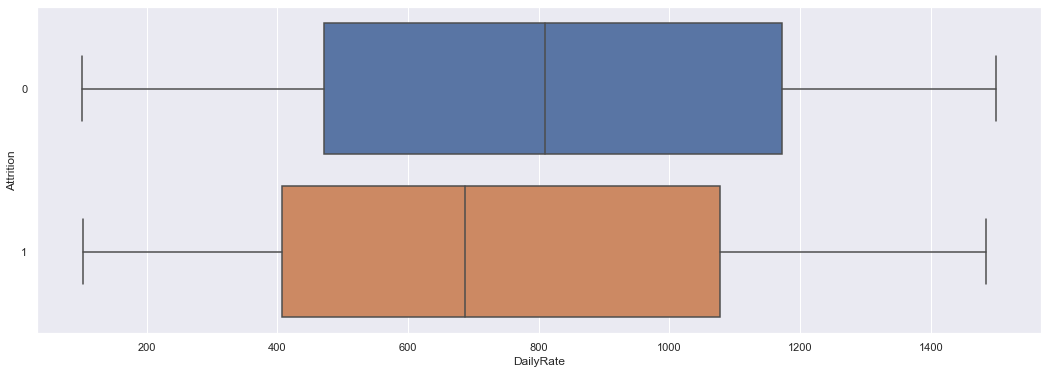

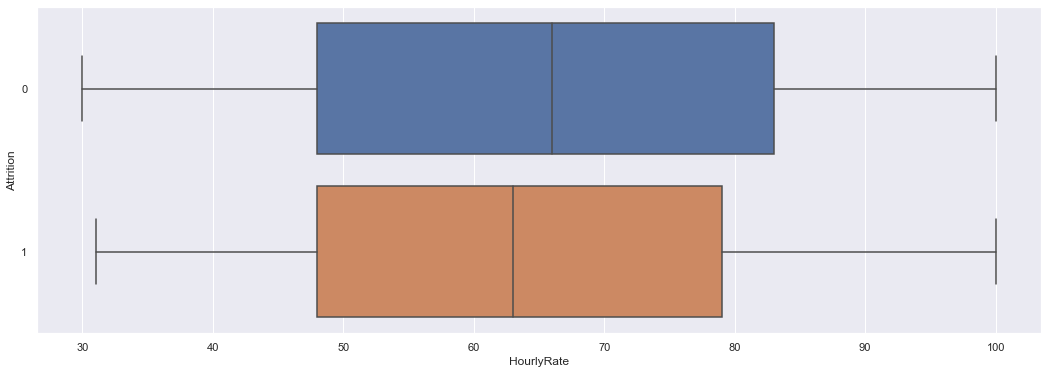

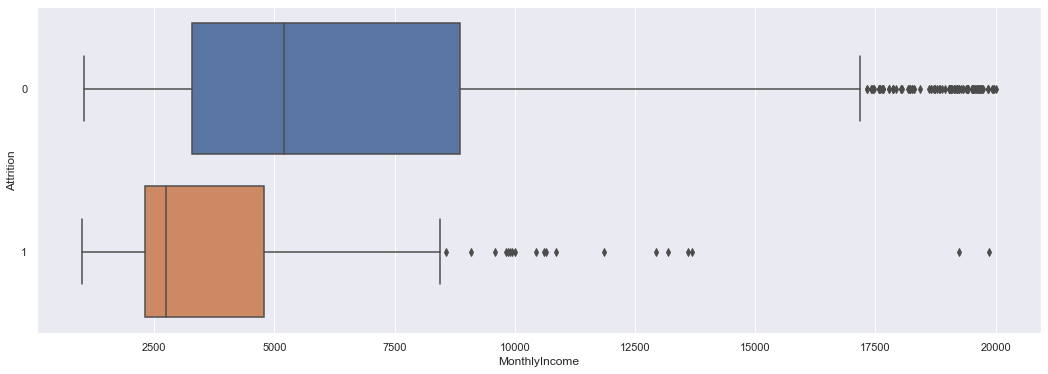

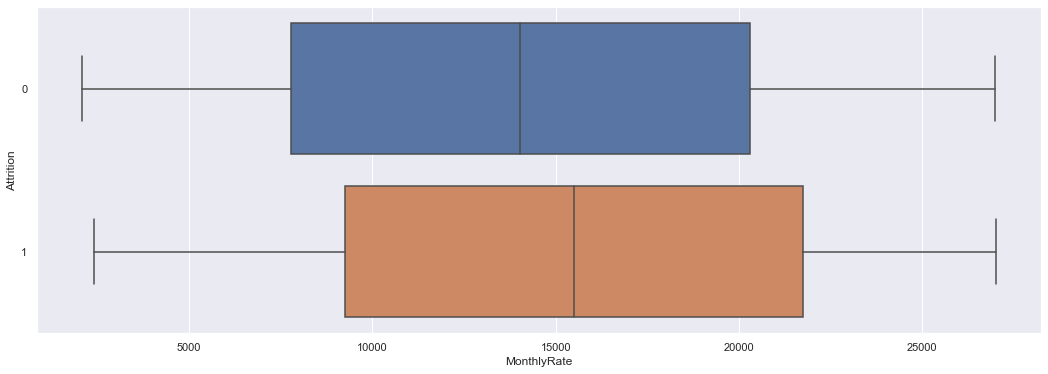

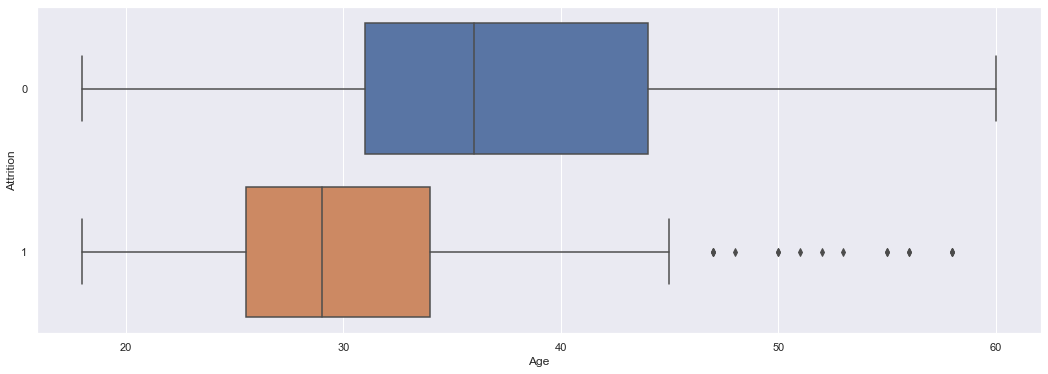

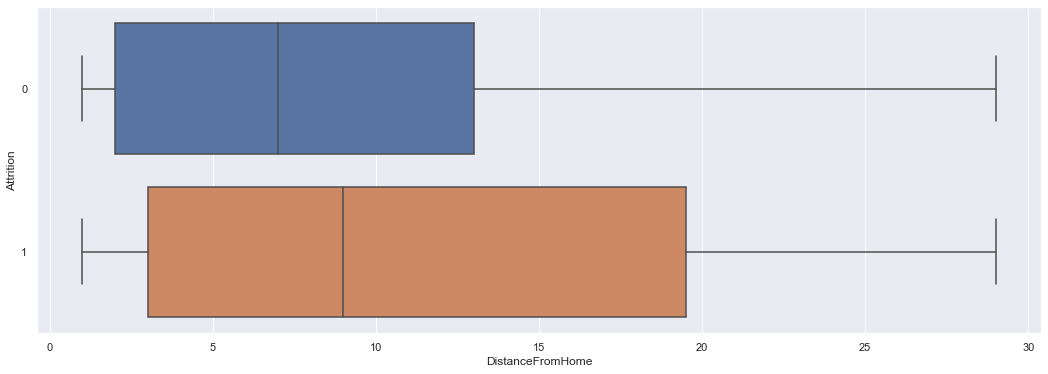

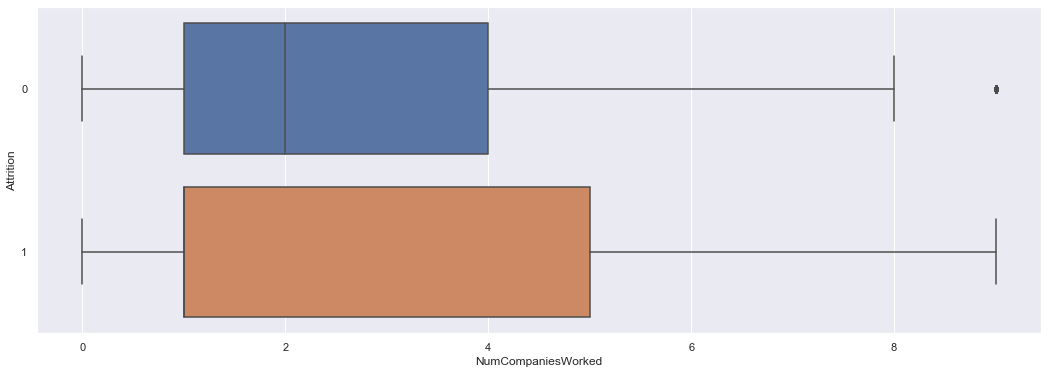

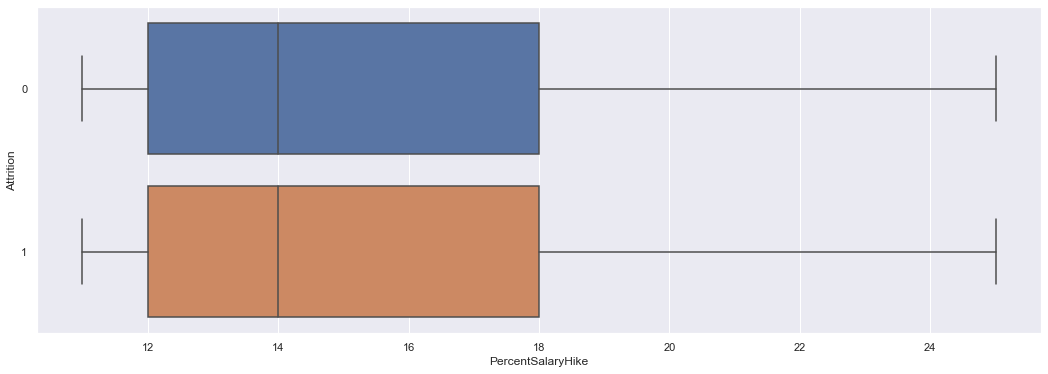

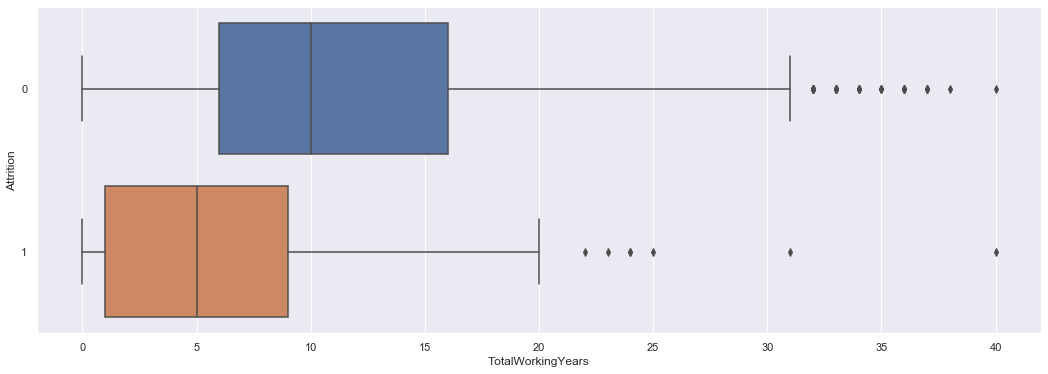

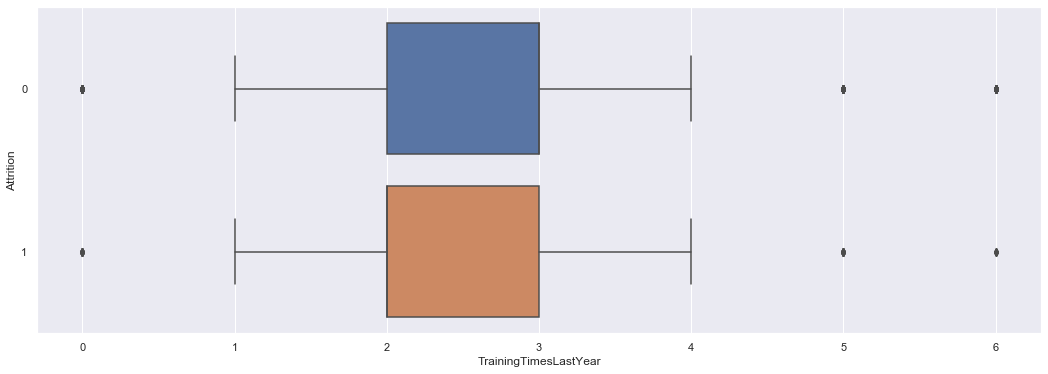

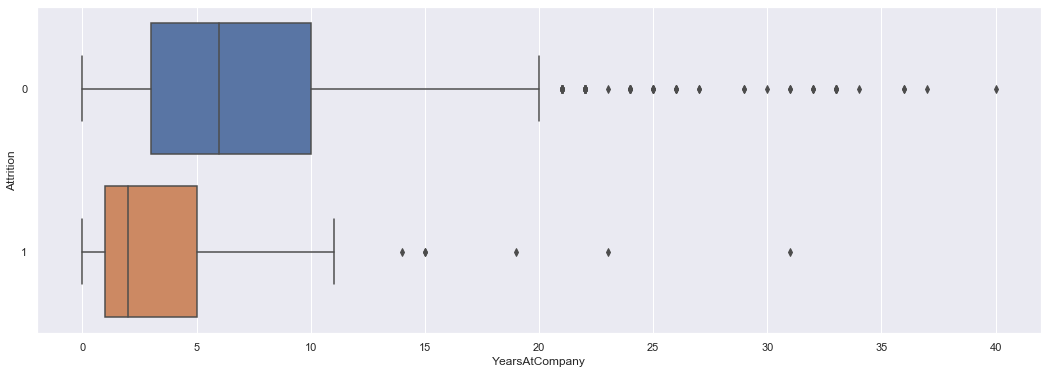

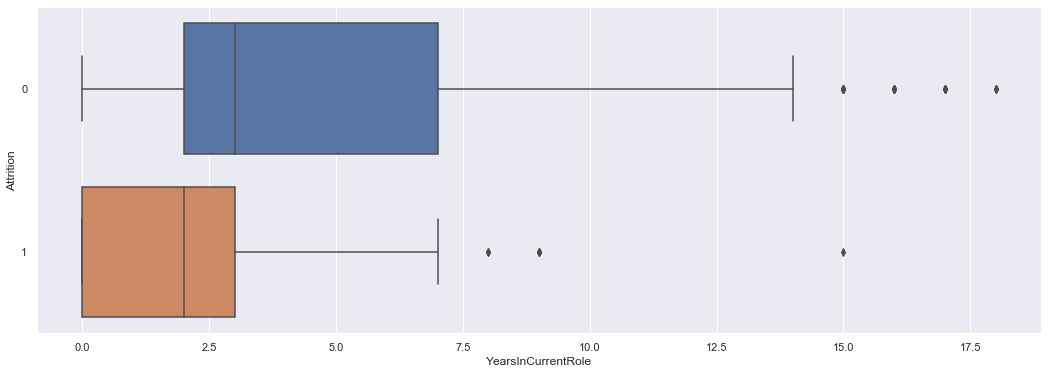

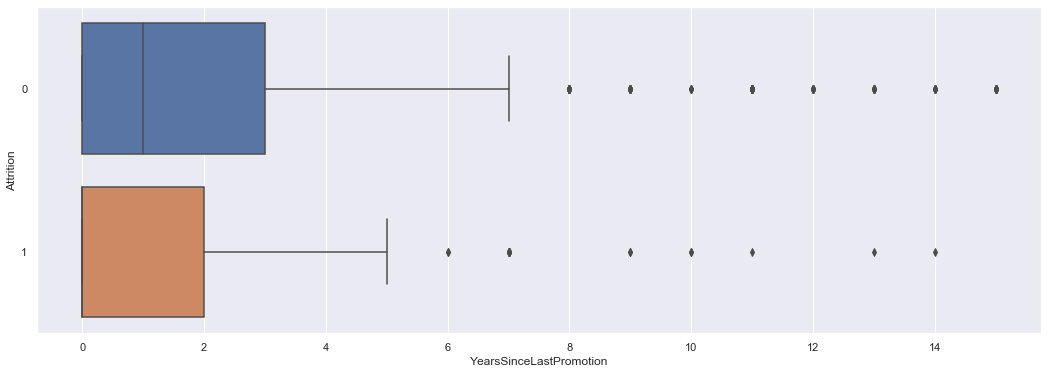

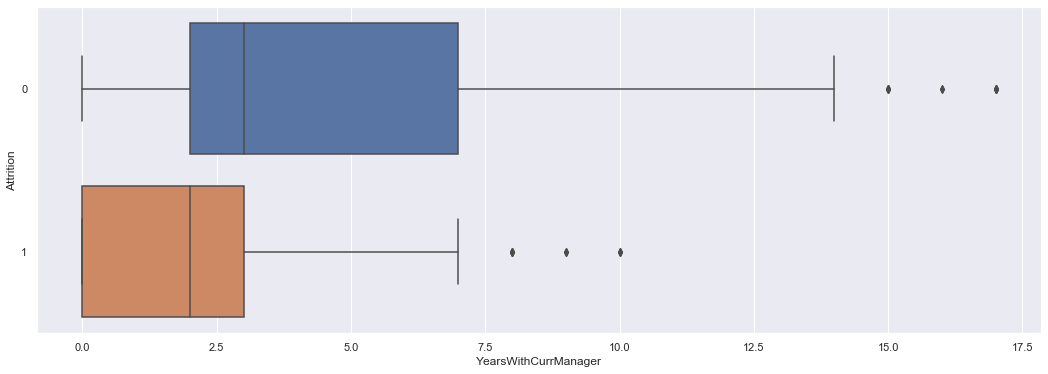

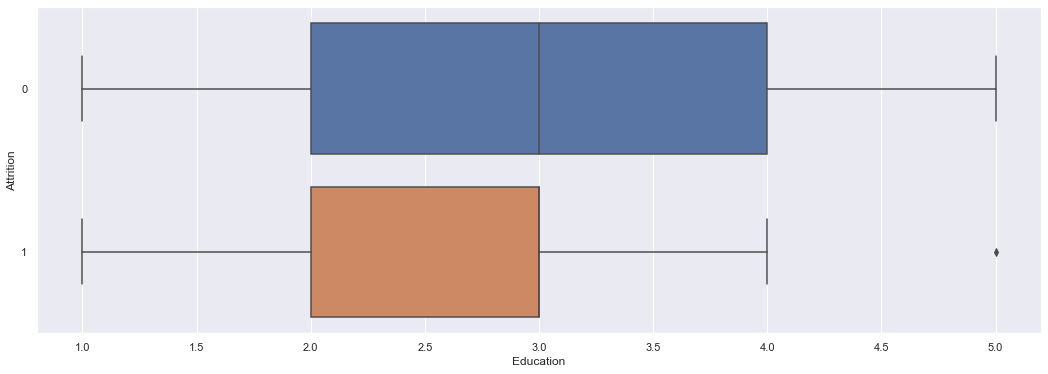

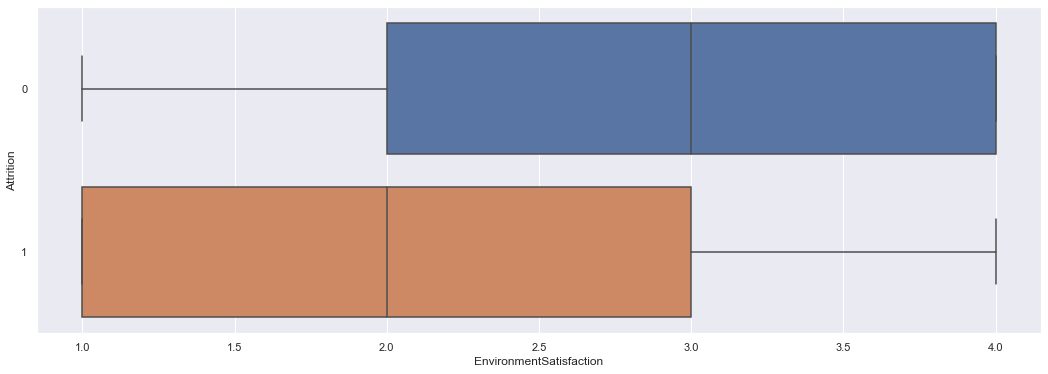

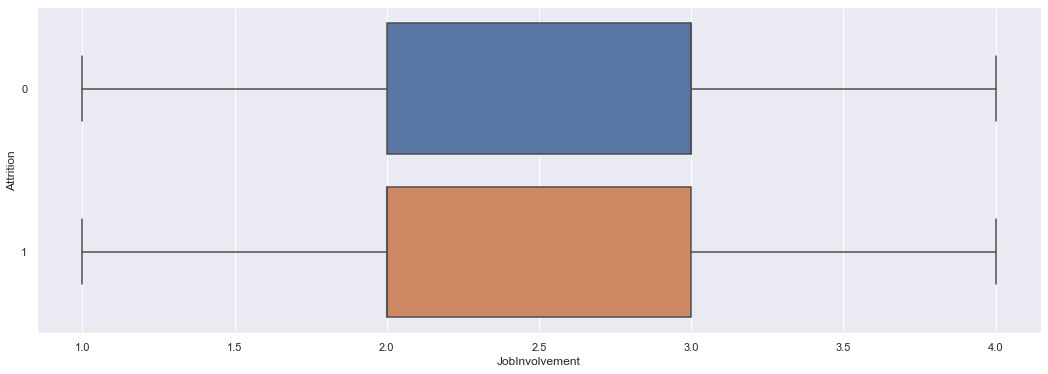

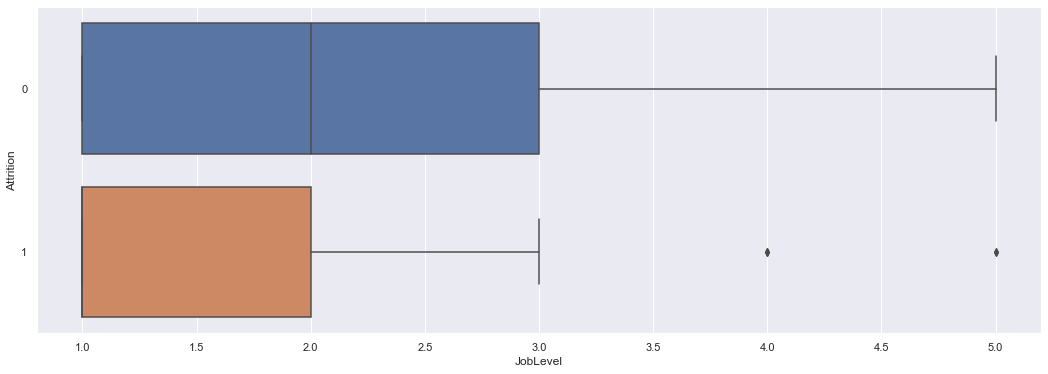

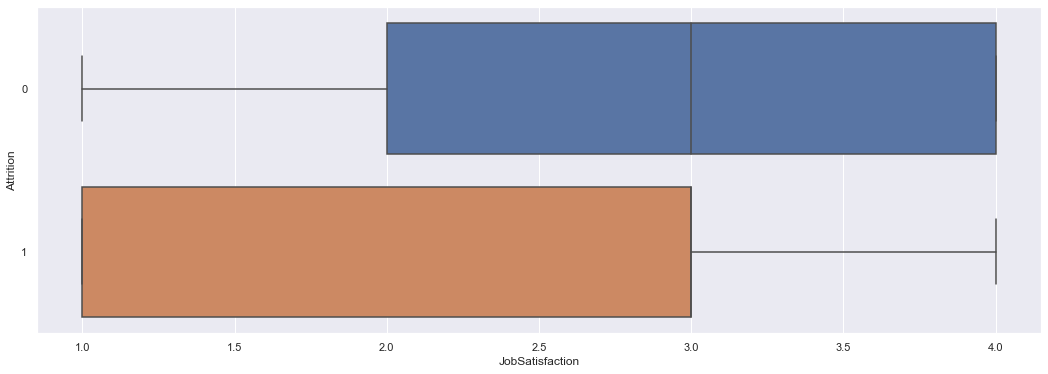

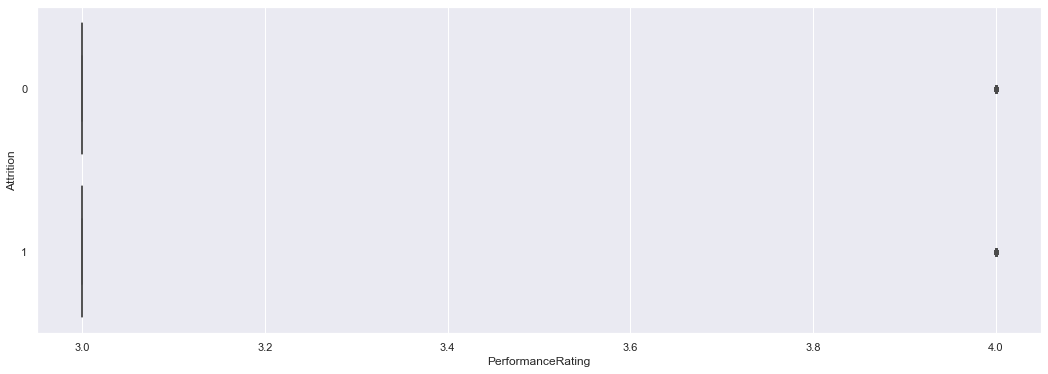

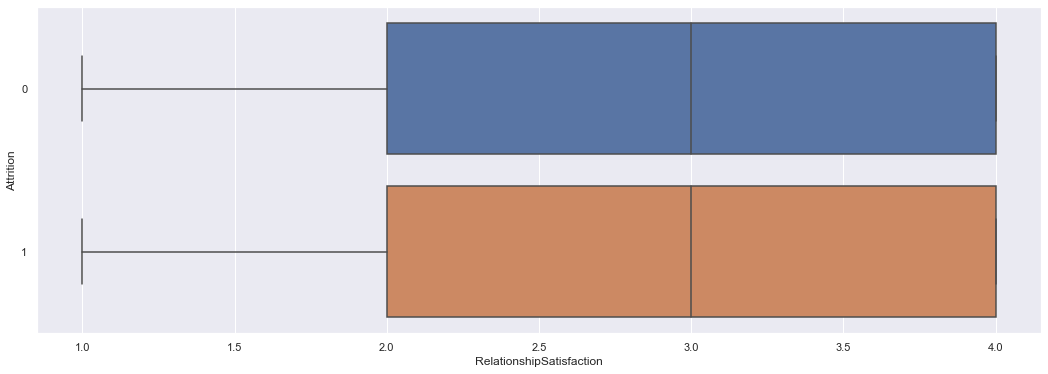

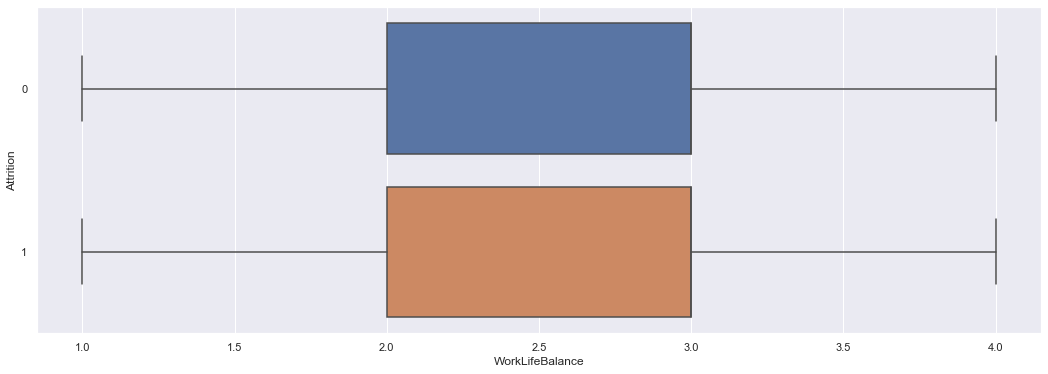

In [21]:
# Joint boxplot of numeric variables against Attrition
healthNumeric_large = healthNumeric[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']]

for var in healthNumeric_large:
  tempdf = healthdata[[var,'Attrition']]
  f = plt.figure(figsize=(18, 6))
  sb.boxplot(x = var, y = "Attrition", data = tempdf, orient = "h")

healthint = healthNumeric[['Age','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike']]

for var in healthint:
  tempdf = healthdata[[var,'Attrition']]
  f = plt.figure(figsize=(18, 6))
  sb.boxplot(x = var, y = "Attrition", data = tempdf, orient = "h")

for var in healthNumeric_time:
  tempdf = healthdata[[var,'Attrition']]
  f = plt.figure(figsize=(18, 6))
  sb.boxplot(x = var, y = "Attrition", data = tempdf, orient = "h")

for var in healthLevel:
  tempdf = healthdata[[var,'Attrition']]
  f = plt.figure(figsize=(18, 6))
  sb.boxplot(x = var, y = "Attrition", data = tempdf, orient = "h")

Categorical Variables

In [22]:
#Different Levels within MaritalStatus
healthdata["MaritalStatus"].value_counts()

Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64

Attrition  MaritalStatus
0          Divorced         353
           Married          716
           Single           408
1          Divorced          24
           Married           61
           Single           114
dtype: int64


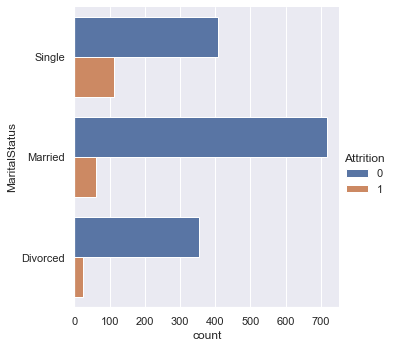

In [23]:
#MaritalStatus
print(healthdata[['Attrition','MaritalStatus']].groupby(['Attrition','MaritalStatus']).size())
sb.catplot(data=healthdata, kind="count", y="MaritalStatus", hue="Attrition")

In [24]:
#Different Levels within JobRole
healthdata["JobRole"].value_counts()

Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64

Attrition  JobRole       
0          Admin              16
           Administrative    114
           Nurse             715
           Other             447
           Therapist         185
1          Administrative      1
           Nurse             107
           Other              87
           Therapist           4
dtype: int64


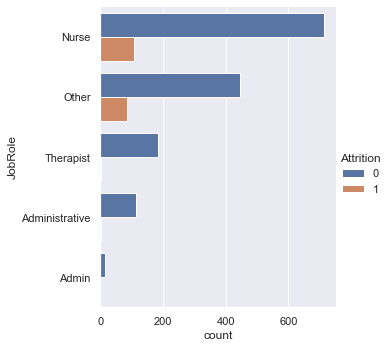

In [25]:
#JobRole
print(healthdata[['Attrition','JobRole']].groupby(['Attrition','JobRole']).size())
sb.catplot(data=healthdata, kind="count", y="JobRole", hue="Attrition")

OverTime  Attrition
No        0            1140
          1              60
Yes       0             337
          1             139
dtype: int64


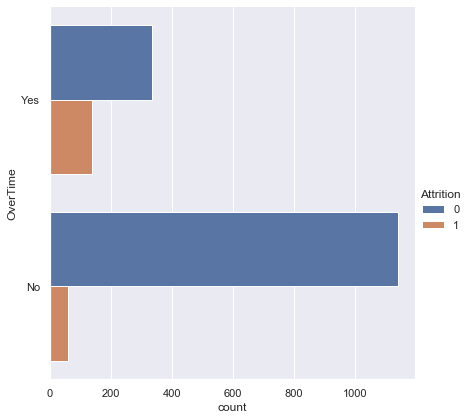

In [26]:
# Different Categories of OverTime
print(healthdata[['Attrition','OverTime']].groupby(['OverTime','Attrition']).size())
sb.catplot(data=healthdata, kind="count", y="OverTime", hue="Attrition", height=6)

In [27]:
# Basic categories of education field
healthdata[['Attrition','Department']].groupby(['Department','Attrition']).size()

Department  Attrition
Cardiology  0            457
            1             74
Maternity   0            698
            1             98
Neurology   0            322
            1             27
dtype: int64

Department  Attrition
Cardiology  0            457
            1             74
Maternity   0            698
            1             98
Neurology   0            322
            1             27
dtype: int64


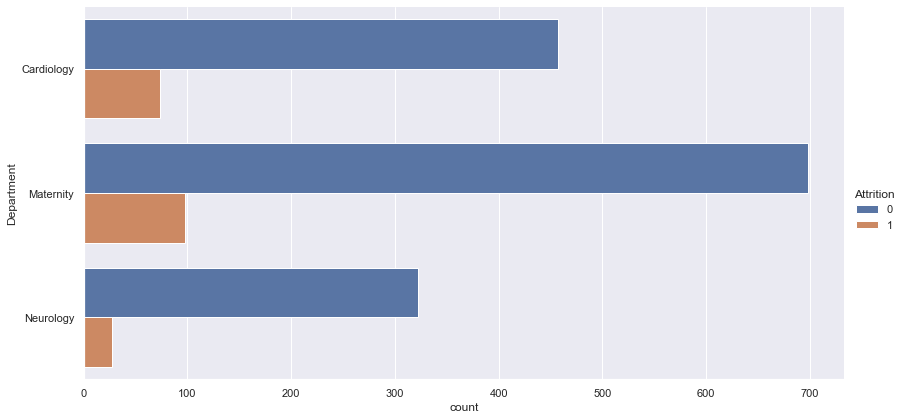

In [28]:
# Categories of department
print(healthdata[['Attrition','Department']].groupby(['Department','Attrition']).size())

# plot and groupby attrition
department_order = ['Cardiology','Maternity', 'Neurology']
sb.catplot(y = 'Department', data = healthdata, kind = 'count', hue = 'Attrition', order = department_order, height = 6, aspect = 2)

In [29]:
# Basic categories of education field
healthdata["EducationField"].value_counts()

Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64

Attrition  EducationField  
0          Human Resources      23
           Life Sciences       613
           Marketing           161
           Medical             473
           Other                80
           Technical Degree    127
1          Human Resources       6
           Life Sciences        84
           Marketing            28
           Medical              51
           Other                 8
           Technical Degree     22
dtype: int64


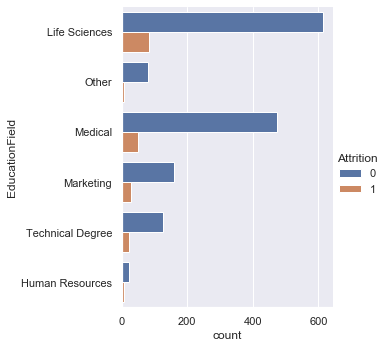

In [30]:
# Plotting the categories of education field 
print(healthdata[['Attrition','EducationField']].groupby(['Attrition','EducationField']).size())
sb.catplot(data=healthdata, kind="count", y="EducationField", hue="Attrition")

In [31]:
# Basic categories of Gender
healthdata["Gender"].value_counts()

Male      998
Female    678
Name: Gender, dtype: int64

Attrition  Gender
0          Female    592
           Male      885
1          Female     86
           Male      113
dtype: int64


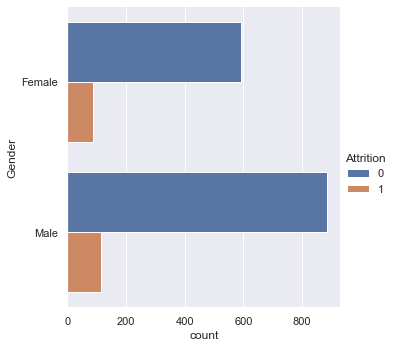

In [32]:
# Plotting Gender
print(healthdata[['Attrition','Gender']].groupby(['Attrition','Gender']).size())
sb.catplot(data=healthdata, kind="count", y="Gender", hue="Attrition")

## STEP 3: Exploratory Data Analysis

At this stage, we will be summarizing the characteristics of our variables and understanding them in an in-depth method before engaging in machine learning.

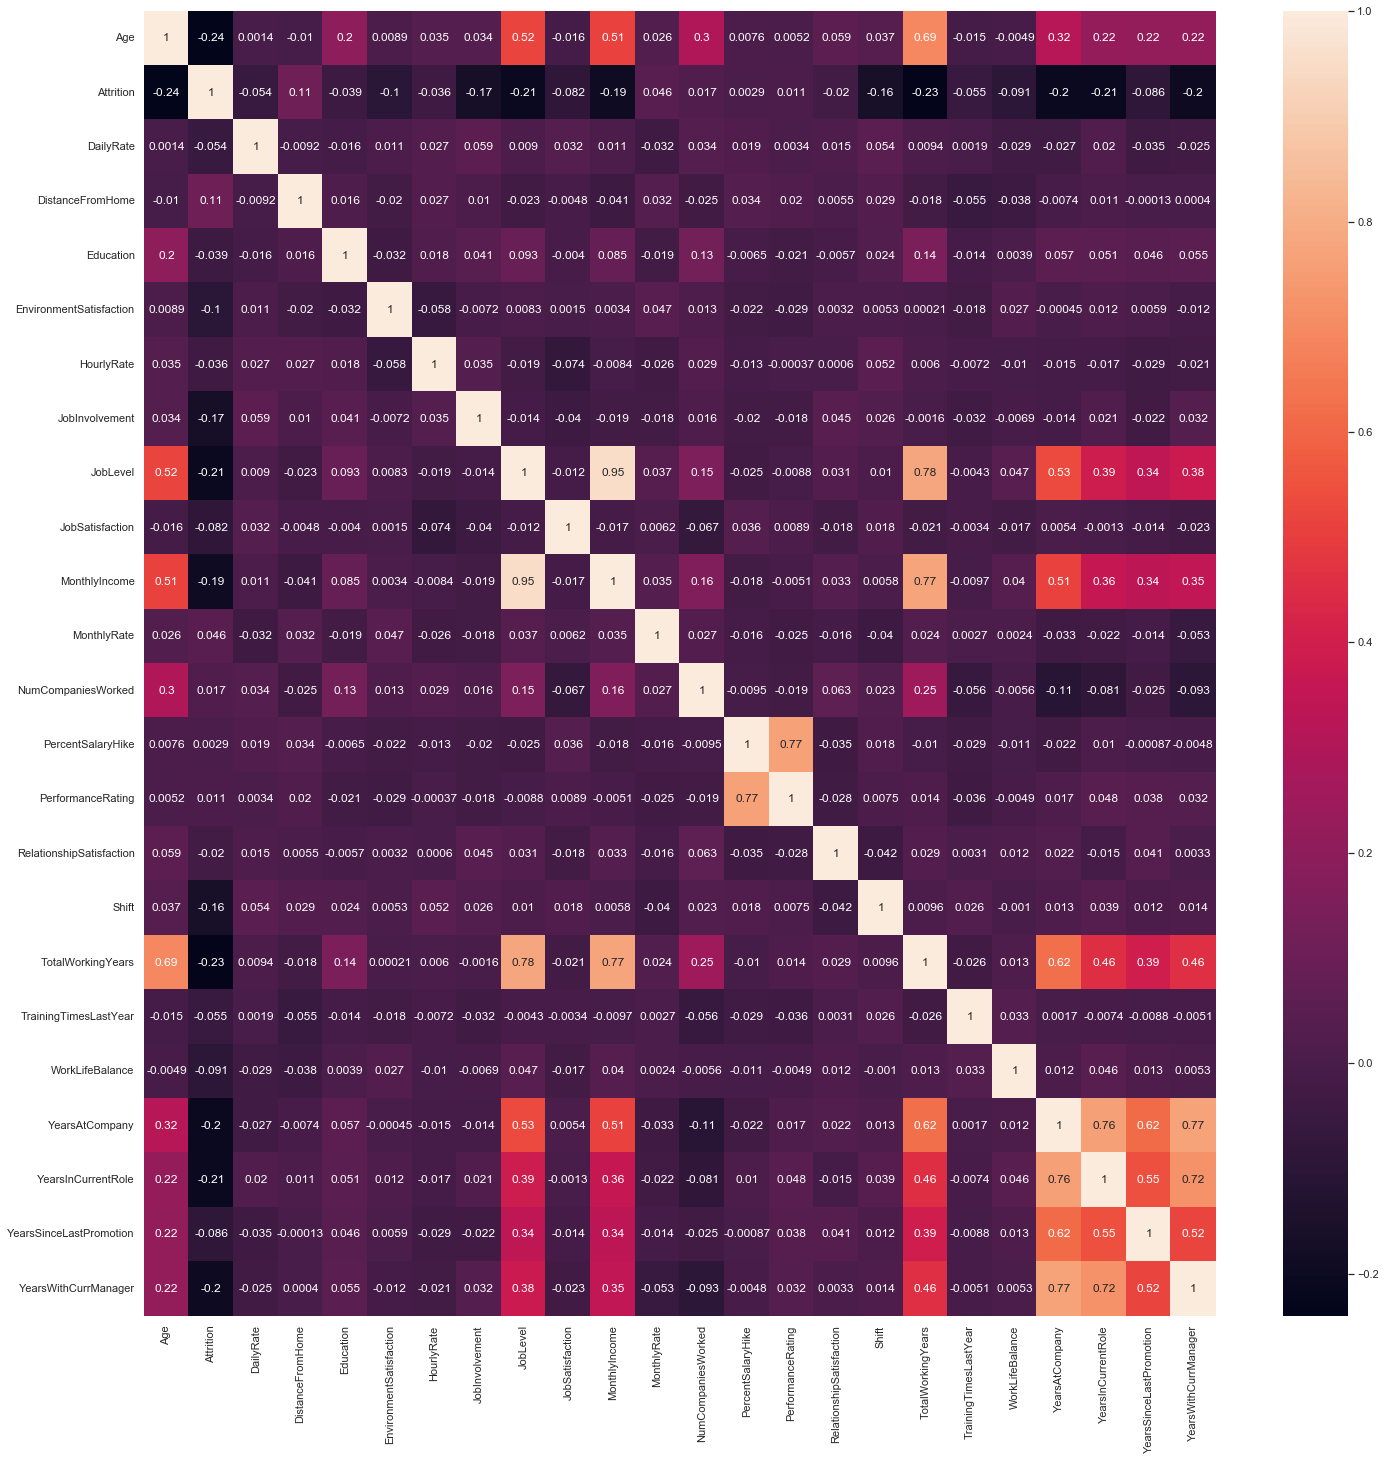

In [33]:
#Correlation matrix of numeric variables against Attrition
plt.figure(figsize=(24,24))
sb.heatmap(healthNumeric.corr(), annot=True)
plt.show()

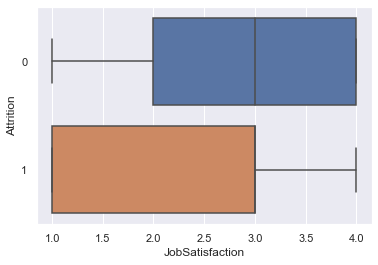

In [34]:
# Analysis of the relation between Job Satisfacation (numeric) and Atrition (categorical)
sb.boxplot(x="JobSatisfaction", y="Attrition", data=healthdata, orient="h")

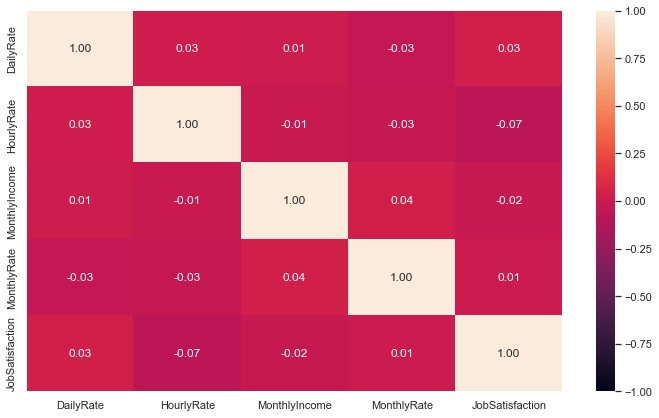

In [35]:
# Correlation between Income Variables and Job Satisfaction
js = pd.DataFrame(healthNumeric['JobSatisfaction'])

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 7))

#for var in healthNumeric_large, find the correlation with job satisfaction
joint_largeNum = pd.concat([healthNumeric_large,js],axis = 1)
corrMat_largeNum = joint_largeNum.corr()
sb.heatmap(corrMat_largeNum, vmin = -1, vmax = 1, annot = True, fmt = ".2f")


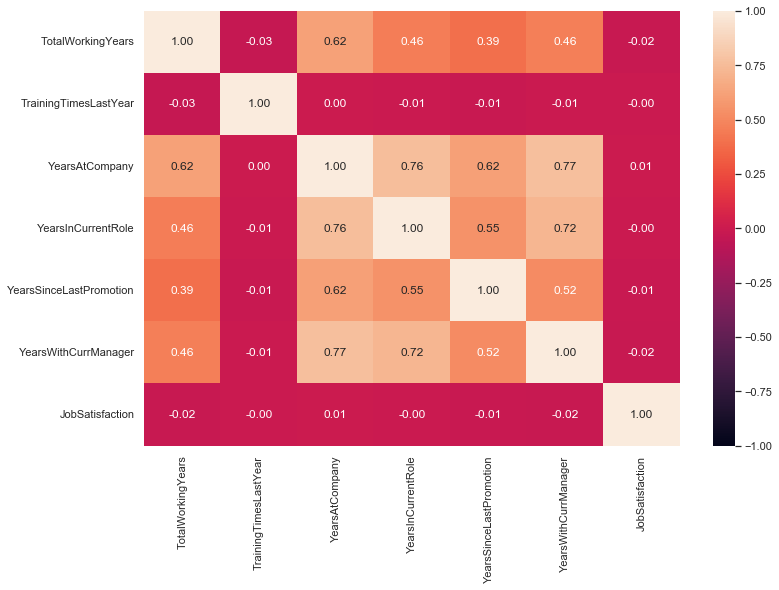

In [36]:
# Correlation between Job satisfaction and Time-related numeric data
js_jointdf = pd.concat([healthNumeric_time,healthdata['JobSatisfaction']],axis=1)

f = plt.figure(figsize=(12, 8))
sb.heatmap(js_jointdf.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

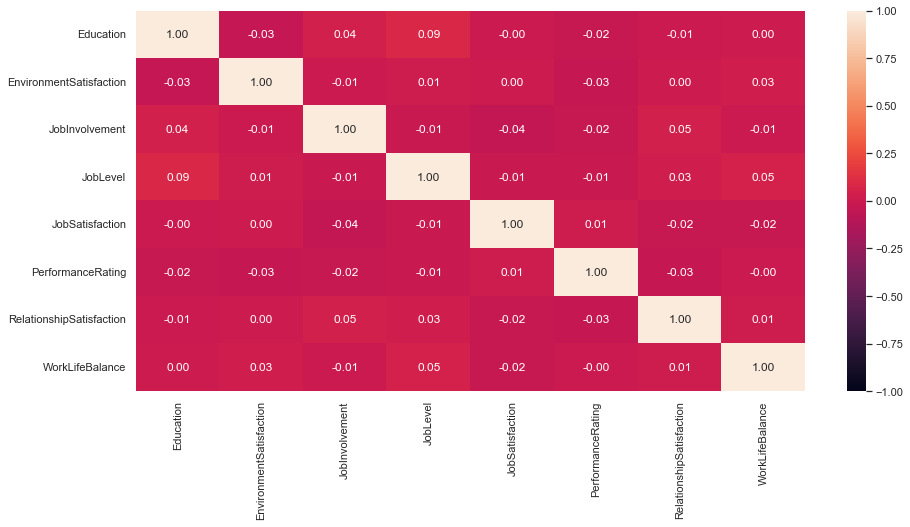

In [37]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(15, 7))

# Correlation between Level-numeric variables and Job Satisfaction
corrMat_Level = healthLevel.corr()
sb.heatmap(corrMat_Level, vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Through the analysis of numeric variables against JobSatisfaction instead of Attrition, we conclude that there were no significant relationships as all the correlations were weak. 

###### Bi-Variate relationship shown in Scatter Plot.

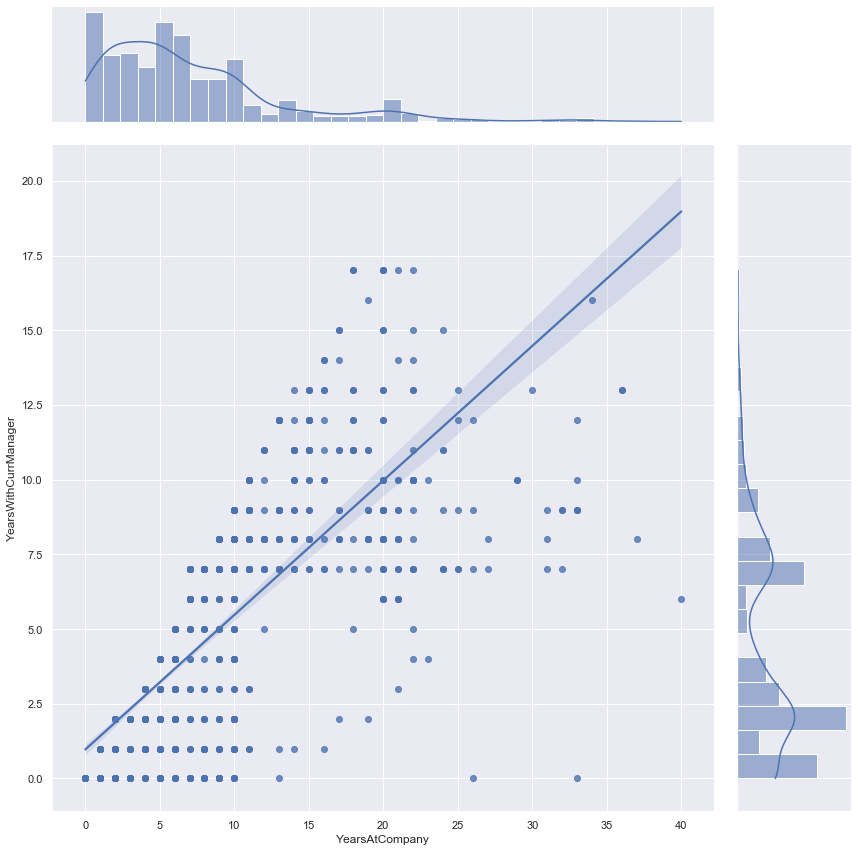

In [38]:
# Corr of YearsAtCompany vs YearsWithCurrManager = 0.77
yearsCompany = pd.DataFrame(healthdata['YearsAtCompany'])
yearsCurrManager = pd.DataFrame(healthdata['YearsWithCurrManager'])

# Creation of a joint dataframe by concatenating the two variables
years_Com_Manager = pd.concat([yearsCompany, yearsCurrManager], axis = 1).reindex(yearsCompany.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = years_Com_Manager, x = "YearsAtCompany", y = "YearsWithCurrManager", height = 12,kind='reg')

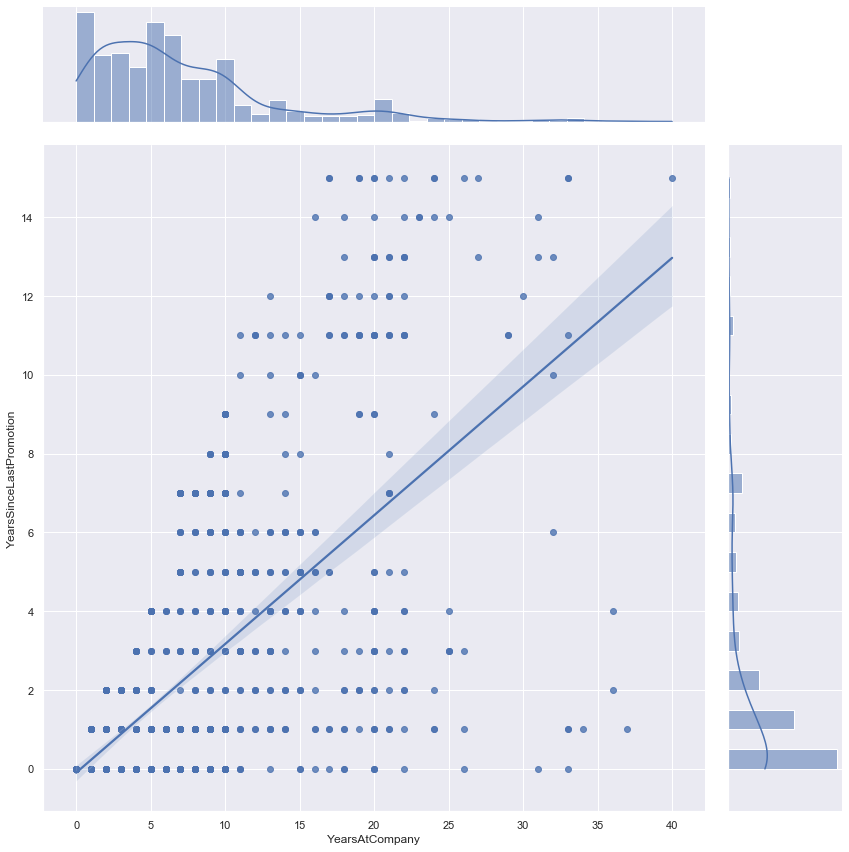

In [39]:
# Corr of YearsAtCompany vs YearsSinceLastPromotion = 0.62
yearsLastPromo = pd.DataFrame(healthdata['YearsSinceLastPromotion'])

# Creation of a joint dataframe by concatenating the two variables
years_Com_lastPromo = pd.concat([yearsCompany, yearsLastPromo], axis = 1).reindex(yearsCompany.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = years_Com_lastPromo, x = "YearsAtCompany", y = "YearsSinceLastPromotion", height = 12,kind='reg')

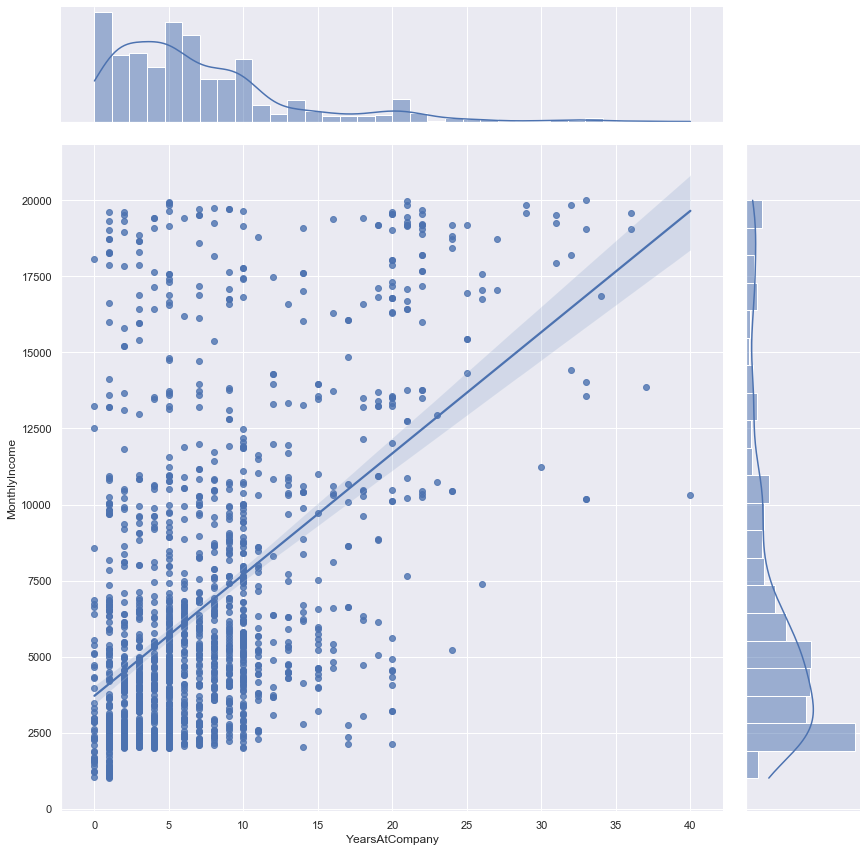

In [40]:
# Corr of YearsAtCompany vs MonthlyIncome = 0.51
monthlyIncome = pd.DataFrame(healthdata['MonthlyIncome'])

# Creation of a joint dataframe by concatenating the two variables
years_Com_monthlyIncome = pd.concat([yearsCompany,monthlyIncome], axis = 1).reindex(yearsCompany.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = years_Com_monthlyIncome, x = "YearsAtCompany", y = "MonthlyIncome", height = 12,kind='reg')

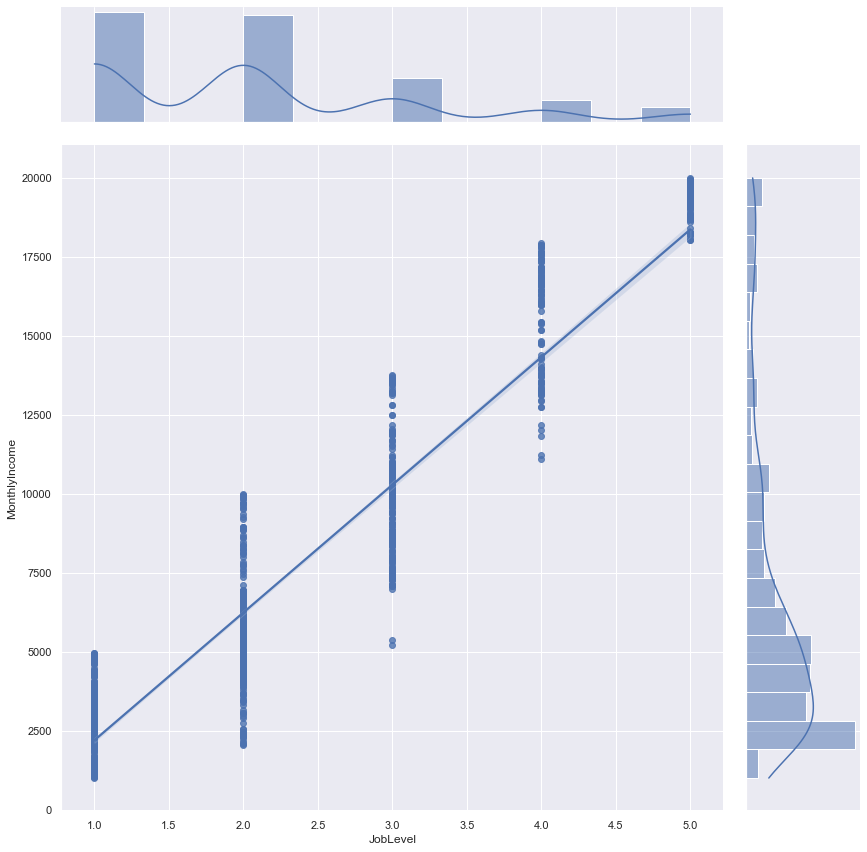

In [41]:
# JobLevel against MonthlyIncome (corr = 0.95)
JobLevel_MonthlyIncome_joint = pd.concat([healthdata['JobLevel'],healthdata['MonthlyIncome']],axis=1)
sb.jointplot(data = JobLevel_MonthlyIncome_joint, x = "JobLevel", y = "MonthlyIncome", height = 12,kind='reg')

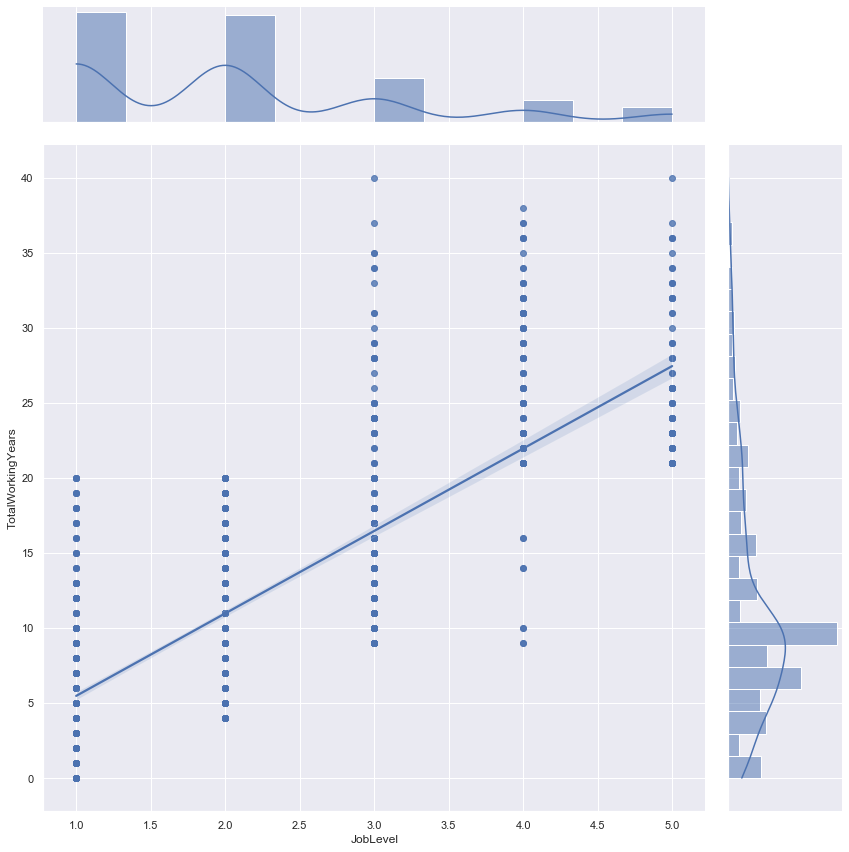

In [42]:
# JobLevel against TotalWorkingYears (corr = 0.78)
JobLevel_TotalWorkingYears_joint = pd.concat([healthdata['JobLevel'],healthdata['TotalWorkingYears']],axis=1)
sb.jointplot(data = JobLevel_TotalWorkingYears_joint, x = "JobLevel", y = "TotalWorkingYears", height = 12,kind='reg')

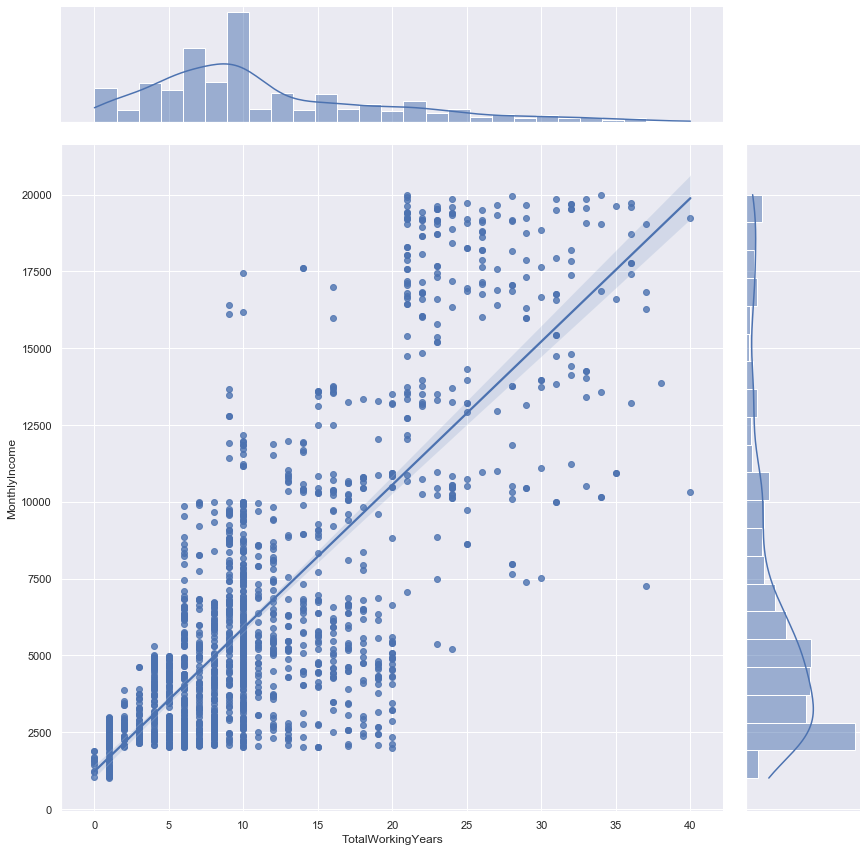

In [43]:
# TotalWorkingYears against MonthlyIncome (corr = 0.77)
TotalWorkingYears_MonthlyIncome_joint = pd.concat([healthdata['TotalWorkingYears'],healthdata['MonthlyIncome']],axis=1)
sb.jointplot(data = TotalWorkingYears_MonthlyIncome_joint, x = "TotalWorkingYears", y = "MonthlyIncome", kind='reg', height = 12)

## STEP 4: MACHINE LEARNING

At this stage, we utilize several predictive models to identify possible patterns within the dataset and base our predictions on them.


##### *RANDOM* FOREST

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

response = pd.read_csv("watson_healthcare_modified.csv",usecols = ['Attrition'])
predics = pd.DataFrame(healthdata[["MonthlyIncome", "Age", "YearsInCurrentRole", "TotalWorkingYears", "JobLevel","JobSatisfaction","EnvironmentSatisfaction","JobInvolvement","YearsWithCurrManager","YearsAtCompany"]])


train_predics,test_predics,train_response,test_response = train_test_split(predics,response,test_size = 0.25, random_state = 42)

# import random forest and fit the data 
rf = RandomForestClassifier(random_state=42,n_jobs=-1)
rf.fit(train_predics,train_response.values.ravel())
#rf.fit(train_predics,train_response.values.ravel())

# use the current model and the test set of predictors to predict the response 
response_pred = rf.predict(test_predics)
print("Accuracy: ",metrics.accuracy_score(test_response,response_pred))

Accuracy:  0.8758949880668258


In [45]:
from sklearn.model_selection import RandomizedSearchCV

# do Hyperparameter tuning using randomized search

params = {
          'max_depth': [2,3,5,10,15,20],
          'min_samples_leaf': [5,10,20],
          'n_estimators': [10,25,30],
}

# Initialize RandomizedSearchCV over random forest model for the defined parameters
random_search = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

# Random search selects random combinations of hyperparameters to train the model
# shorter time to compute but may not find as accurate of a result as grid search
random_search.fit(train_predics,train_response)
#random_search.fit(train_predics,train_response.values.ravel())



Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [46]:
# find the best estimator for randomized search
print(random_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [47]:
# print the best score of model that uses randomized search
# generally a higher accuracy can be achieved after tuning 
print(random_search.best_score_)

0.9029420685471642


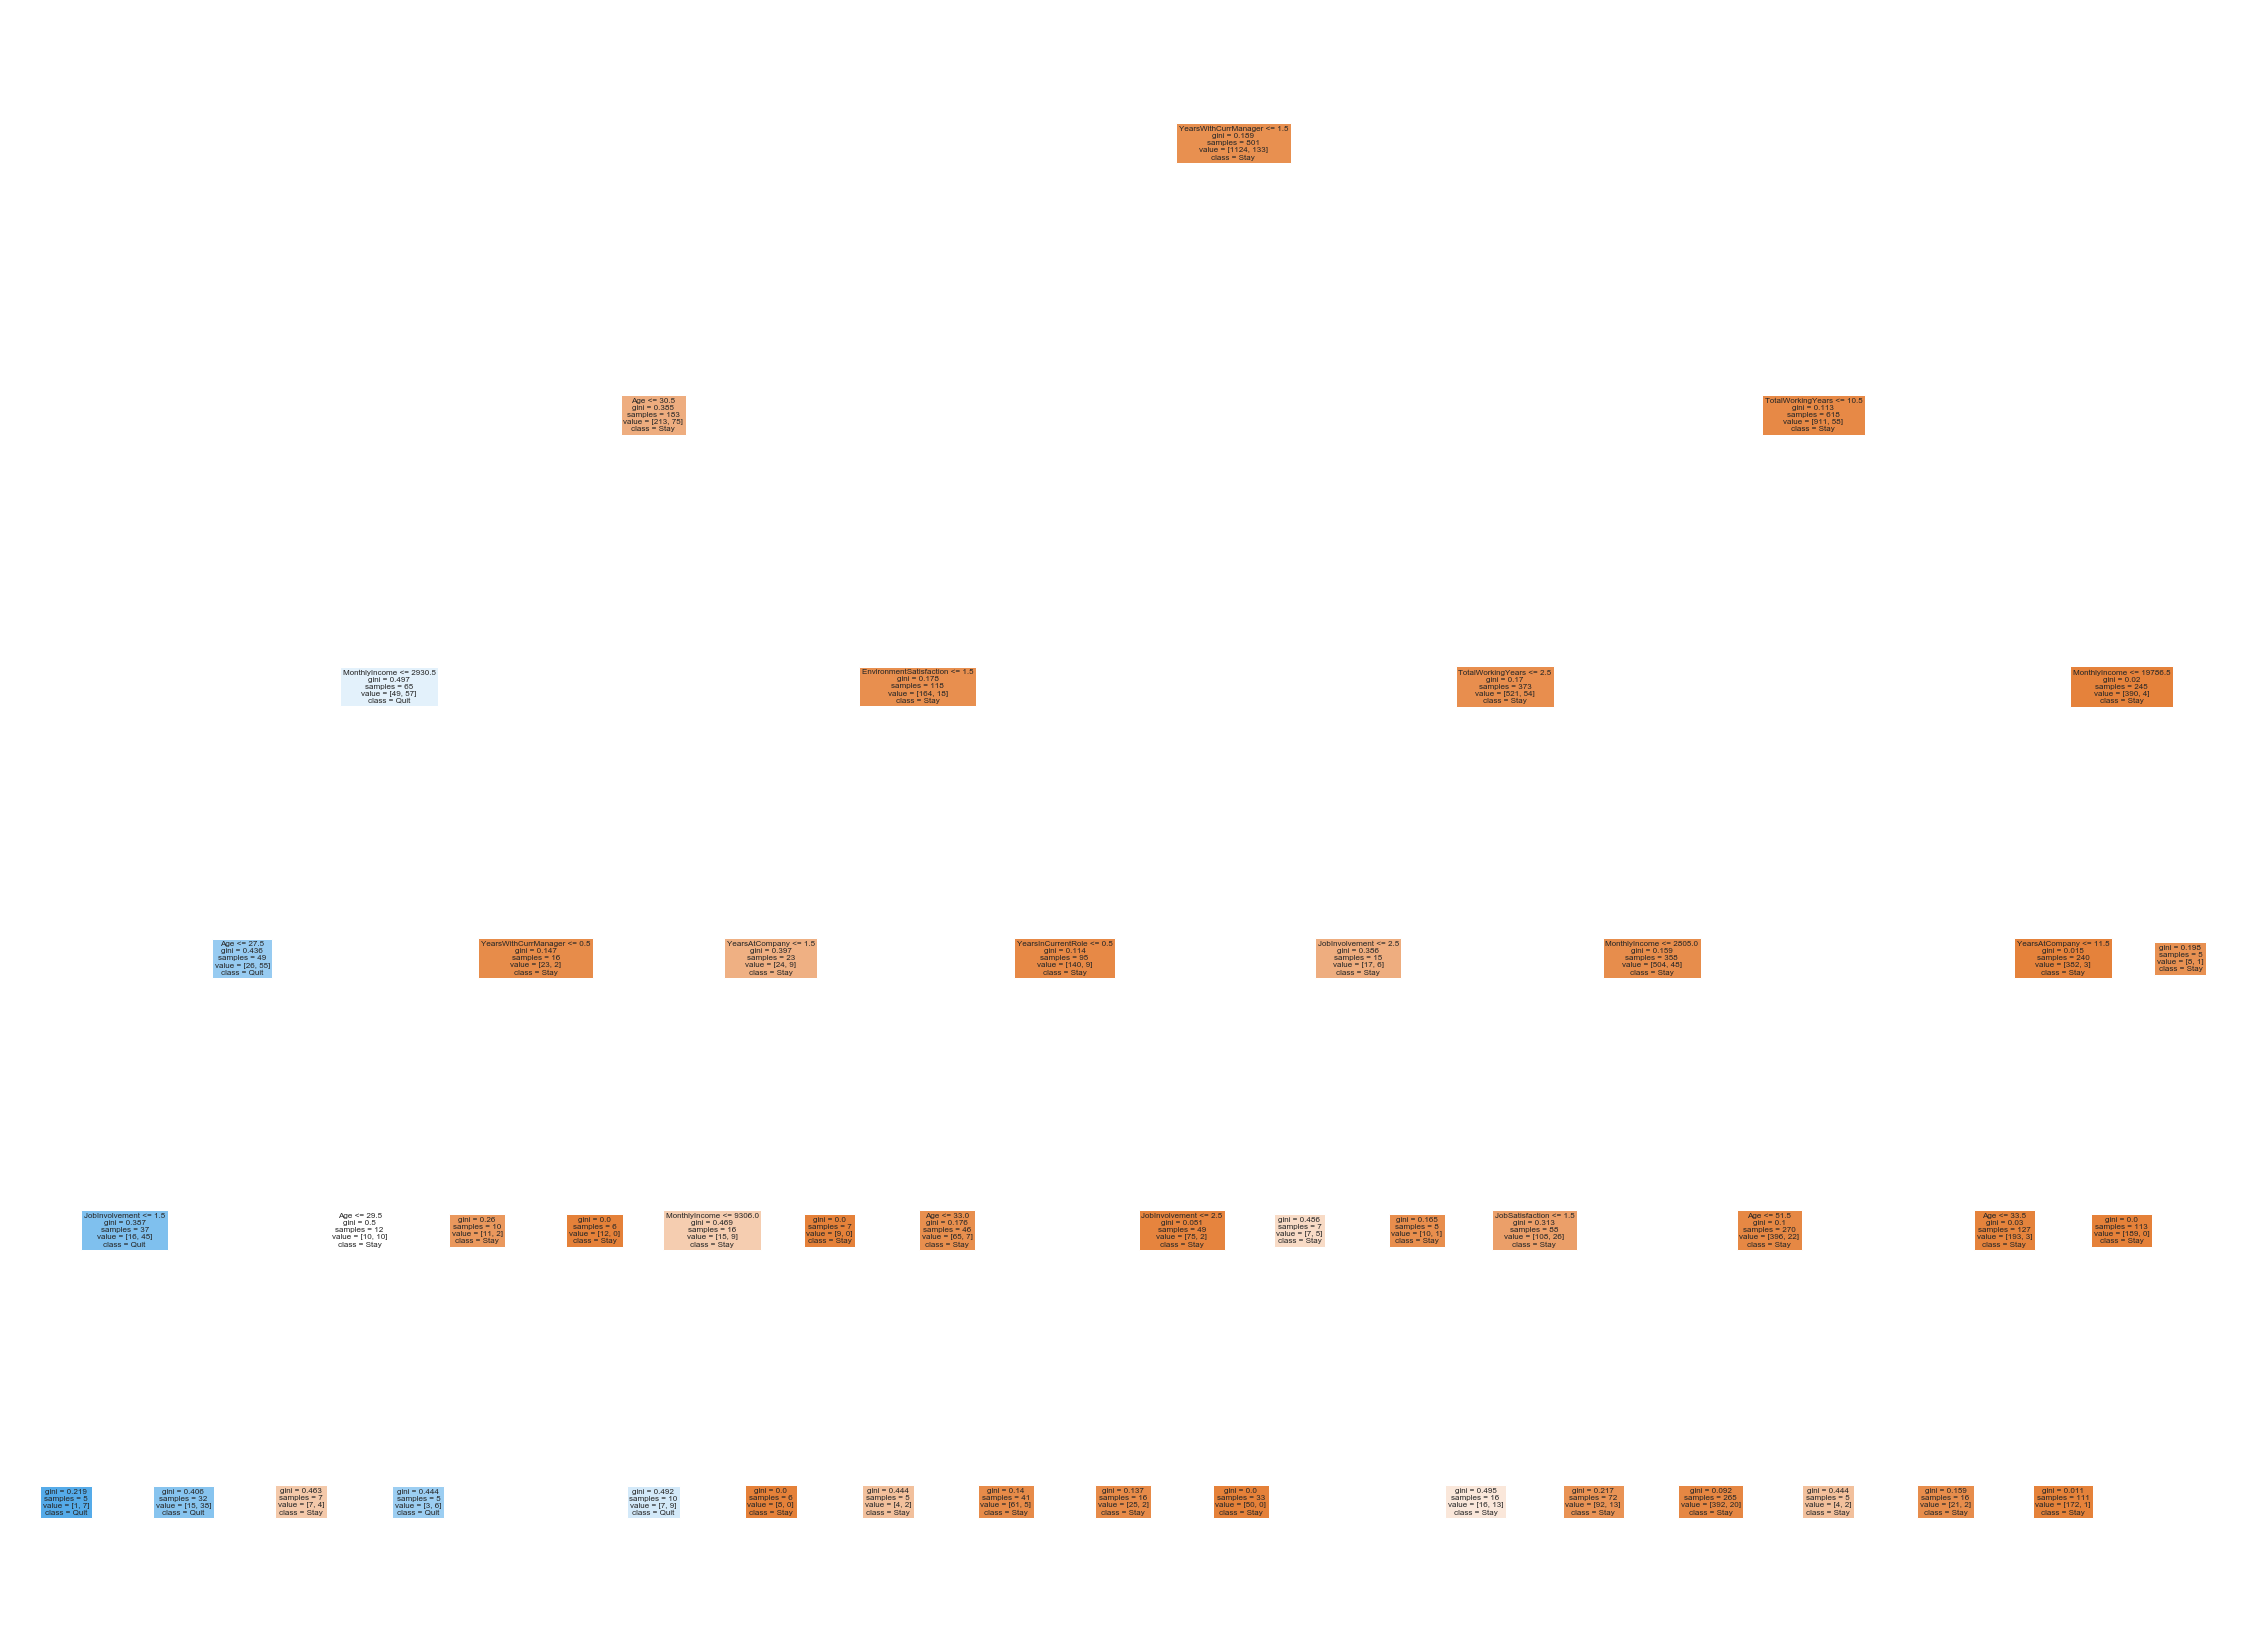

In [48]:
# plot one of the trees from random forest 
from sklearn.tree import plot_tree

randomized_best = random_search.best_estimator_

plt.figure(figsize=(40,30))

# tree created by estimators_[2], each tree is independent of each other
plot_tree(randomized_best.estimators_[2],feature_names = predics.columns,class_names=['Stay','Quit'],filled=True);

#### CLASSIFICATION MODEL 
Logistic Regression Model: Predict probability of categorical dependent variable (Attrition) using categorical variables (OverTime,Gender,MaritalStatus,Department,EducationField) in the dataset

In [49]:
cate_pred = pd.DataFrame(healthdata[["OverTime","Gender","MaritalStatus","Department","EducationField"]])
cate_pred

,OverTime,Gender,MaritalStatus,Department,EducationField
0,Yes,Female,Single,Cardiology,Life Sciences
1,No,Male,Married,Maternity,Life Sciences
2,Yes,Male,Single,Maternity,Other
3,Yes,Female,Married,Maternity,Life Sciences
4,No,Male,Married,Maternity,Medical
...,...,...,...,...,...
1671,Yes,Male,Single,Neurology,Technical Degree
1672,Yes,Female,Married,Cardiology,Marketing
1673,No,Female,Single,Maternity,Life Sciences
1674,No,Female,Married,Neurology,Life Sciences


In [50]:
# convert categorical data into indicator variables 
cate_pred = pd.get_dummies(cate_pred,columns=['OverTime','Gender'],drop_first=True)
cate_pred = pd.get_dummies(cate_pred,prefix = ['MaritalStatus','Department','EducationField'] ,columns = ['MaritalStatus','Department','EducationField'])
cate_pred

,OverTime_Yes,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Cardiology,Department_Maternity,Department_Neurology,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
2,1,1,0,0,1,0,1,0,0,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,1,0,0,0,0
4,0,1,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1,1,0,0,1,0,0,1,0,0,0,0,0,1
1672,1,0,0,1,0,1,0,0,0,0,1,0,0,0
1673,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1674,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter("ignore")
lr = LogisticRegression()

resp = pd.read_csv("watson_healthcare_modified.csv",usecols = ['Attrition'])

# random split the dataset into test and train
train_pred, test_pred, train_resp, test_resp = train_test_split(cate_pred,resp,test_size = 0.25, random_state = 42)

# fit the logistic regression model with train dataset
lr.fit(train_pred,train_resp)

train_accuracy = lr.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_accuracy))

resp_pred = lr.predict(test_pred)
test_accuracy = accuracy_score(test_resp,resp_pred)
print('Accuracy on the test set: {:.2f}'.format(test_accuracy))

Accuracy on the train set: 0.90
Accuracy on the test set: 0.86


In [52]:
from sklearn.feature_selection import RFE

# get the rank of importance of categorical predictors
selector = RFE(lr, n_features_to_select = 1)
selector = selector.fit(train_pred,train_resp.Attrition.ravel())

x=1
for i in train_pred.columns:
    print(x,":",i)
    x+=1

1 : OverTime_Yes
2 : Gender_Male
3 : MaritalStatus_Divorced
4 : MaritalStatus_Married
5 : MaritalStatus_Single
6 : Department_Cardiology
7 : Department_Maternity
8 : Department_Neurology
9 : EducationField_Human Resources
10 : EducationField_Life Sciences
11 : EducationField_Marketing
12 : EducationField_Medical
13 : EducationField_Other
14 : EducationField_Technical Degree


In [53]:
# calculate performance metrics to show accuracy, precision and recall
# precision: percent of correct prediction: TP/(TP+FP)
# recall: percert of positive cases caught: TP/(TP+FN)
# F1 score: percent of positive prediction that were correct: use to compare classifier models, not global accuracy

print(classification_report(test_resp,resp_pred))

              precision    recall  f1-score   support

          No       0.87      0.98      0.92       357
         Yes       0.61      0.18      0.27        62

    accuracy                           0.86       419
   macro avg       0.74      0.58      0.60       419
weighted avg       0.83      0.86      0.83       419



<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

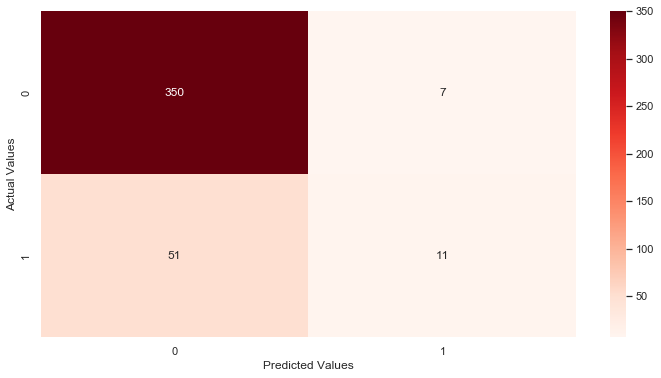

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_resp,resp_pred)
plt.figure(figsize=(12,6))
sb.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt

In [55]:
#!pip install torch

### SIMPLE NEURAL NETWORK

The PyTorch Library, referred to as "torch" is a machine-learning source developed by FaceBook AI Research and is used to build and train machine learning models directly within the notebook environment.

In [56]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from torch.autograd import Variable

In [57]:
# extract highly related attributes and 'Attrition'
health_nn = healthdata[['MonthlyIncome','DistanceFromHome','YearsInCurrentRole','Attrition']]
nn_train, nn_test = train_test_split(health_nn, test_size = 0.2)

In [58]:
nn_train.head()

,MonthlyIncome,DistanceFromHome,YearsInCurrentRole,Attrition
1076,8376,6,0,0
1142,4663,12,2,0
1444,8938,3,4,0
357,2174,1,2,1
1032,2109,8,2,0


In [59]:
# Create the class Dataset to convert the data types of train data to be processed by DataLoader
class Dataset():

  def __init__(self):

    x=nn_train[['MonthlyIncome','DistanceFromHome','YearsInCurrentRole']].values
    y=nn_train['Attrition'].values

    self.x_train=torch.tensor(x,dtype=torch.float32)
    self.y_train=torch.tensor(y,dtype=torch.float32)

  def __len__(self):
    return len(self.y_train)
  
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

# Create the class Dataset2 to convert the data types of test data to be processed by DataLoader
class Dataset2():

  def __init__(self):

    x=nn_test[['MonthlyIncome','DistanceFromHome','YearsInCurrentRole']].values
    y=nn_test['Attrition'].values

    self.x_test=torch.tensor(x,dtype=torch.float32)
    self.y_test=torch.tensor(y,dtype=torch.float32)

  def __len__(self):
    return len(self.y_test)
  
  def __getitem__(self,idx):
    return self.x_test[idx],self.y_test[idx]

In [60]:
# build dataloader for train and test data
myDs = Dataset()
myDs2 = Dataset()

train_loader = DataLoader(myDs,batch_size=100,shuffle=False)
test_loader = DataLoader(myDs2,batch_size=100,shuffle=False)

In [61]:
# build a simple multilayer perceptron model with two hidden layers
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes): #input_size: num of attributes, num_classes: num of labels
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [62]:
model = Net(3, 100, 50, 2)
print(model)

Net(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)


In [63]:
# our model
net = Net(3, 100, 50, 2)

# our loss function
criterion = nn.CrossEntropyLoss()

# our optimizer
learning_rate = 0.0001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0) 

In [64]:
# start training the model

num_epochs = 3

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items, classes) in enumerate(train_loader):
        
        items = Variable(items)
        classes = Variable(classes)
        
        # Put the model in training mode
        net.train()           
        
        # Calculate the loss and gradients
        optimizer.zero_grad()
        outputs = net(items)
        loss = criterion(outputs, classes.to(torch.int64))
        loss.backward()       
        optimizer.step()      
        
        # Record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, (len(nn_train)//100)+1, loss.data.item()))

    # Model in evaluation mode
    net.eval()                 
    
    # Record the loss and train accuracy
    train_loss.append(loss.data.item())
    train_accuracy.append((100 * train_correct / train_total))
    
    # Record the correct predictions for test data
    test_items = torch.FloatTensor(nn_test.values[:, 0:3])
    test_classes = torch.LongTensor(nn_test.values[:, 3])

    # Record the test accuracy
    outputs = net(Variable(test_items))
    loss = criterion(outputs, Variable(test_classes))
    test_loss.append(loss.data.item())
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct / total))

Epoch 1/3, Iteration 1/14, Loss: 263.5815
Epoch 1/3, Iteration 2/14, Loss: 1045.6674
Epoch 1/3, Iteration 3/14, Loss: 1055.2772
Epoch 1/3, Iteration 4/14, Loss: 399.9088
Epoch 1/3, Iteration 5/14, Loss: 1021.9855
Epoch 1/3, Iteration 6/14, Loss: 900.0886
Epoch 1/3, Iteration 7/14, Loss: 1532.4946
Epoch 1/3, Iteration 8/14, Loss: 452.6364
Epoch 1/3, Iteration 9/14, Loss: 34.1512
Epoch 1/3, Iteration 10/14, Loss: 402.3283
Epoch 1/3, Iteration 11/14, Loss: 166.0119
Epoch 1/3, Iteration 12/14, Loss: 98.1238
Epoch 1/3, Iteration 13/14, Loss: 250.5416
Epoch 1/3, Iteration 14/14, Loss: 85.7867
Epoch 2/3, Iteration 1/14, Loss: 29.0738
Epoch 2/3, Iteration 2/14, Loss: 13.5318
Epoch 2/3, Iteration 3/14, Loss: 8.7800
Epoch 2/3, Iteration 4/14, Loss: 0.5866
Epoch 2/3, Iteration 5/14, Loss: 0.4270
Epoch 2/3, Iteration 6/14, Loss: 0.4139
Epoch 2/3, Iteration 7/14, Loss: 0.4717
Epoch 2/3, Iteration 8/14, Loss: 0.3874
Epoch 2/3, Iteration 9/14, Loss: 0.3845
Epoch 2/3, Iteration 10/14, Loss: 0.3605
Epo

In [65]:
# Print the accuracy of train and test data
for i in range(3):
  print(f"Epoch {i+1}: train accuracy = {train_accuracy[i]:.2f}, test accuracy = {test_accuracy[i]:.2f}")

Epoch 1: train accuracy = 70.60, test accuracy = 85.42
Epoch 2: train accuracy = 88.81, test accuracy = 85.42
Epoch 3: train accuracy = 88.81, test accuracy = 85.42
